## My public kernel: https://www.kaggle.com/podsyp/complete-linear-model-guide

### Objective for competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

* Predict the value of homes.
* Exploratory data analysis.
* Feature engineering.
* Create your own regression models.
* Compare metrics.
* Choose a model.
* To predict.

# Import

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import pandas_summary as ps

from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc

from scipy.stats import norm

In [3]:
sns.set()
warnings.simplefilter('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### We collect the metrics of all the algorithms

In [4]:
all_metrics = []

# Read data

In [5]:
folder = 'data/'
train_df = pd.read_csv(folder+'train.csv')
test_df = pd.read_csv(folder+'test.csv')
sub_df = pd.read_csv(folder+'sample_submission.csv')

In [6]:
print('train: ', train_df.shape)
print('test: ', test_df.shape)
print('sample_submission: ', sub_df.shape)

train:  (1460, 81)
test:  (1459, 80)
sample_submission:  (1459, 2)


In [7]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [11]:
sub_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# Describe the data

In [12]:
dfs = ps.DataFrameSummary(train_df)
print('categoricals: ', dfs.categoricals.tolist())
print('numerics: ', dfs.numerics.tolist())
dfs.summary()

categoricals:  ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
numerics:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460,1460,NaN,1201,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460,1460,1460,1460,NaN,NaN,NaN,NaN,NaN,1452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1460,NaN,1460,1460,1460,NaN,NaN,NaN,NaN,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,NaN,1460,NaN,1460,NaN,NaN,1379,NaN,1460,1460,NaN,NaN,NaN,1460,1460,1460,1460,1460,1460,NaN,NaN,NaN,1460,1460,1460,NaN,NaN,1460
mean,730.5,56.8973,NaN,70.05,10516.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.09932,5.57534,1971.27,1984.87,NaN,NaN,NaN,NaN,NaN,103.685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.64,NaN,46.5493,567.24,1057.43,NaN,NaN,NaN,NaN,1162.63,346.992,5.84452,1515.46,0.425342,0.0575342,1.56507,0.382877,2.86644,1.04658,NaN,6.51781,NaN,0.613014,NaN,NaN,1978.51,NaN,1.76712,472.98,NaN,NaN,NaN,94.2445,46.6603,21.9541,3.40959,15.061,2.7589,NaN,NaN,NaN,43.489,6.32192,2007.82,NaN,NaN,180921
std,421.61,42.3006,NaN,24.2848,9981.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.383,1.1128,30.2029,20.6454,NaN,NaN,NaN,NaN,NaN,181.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098,NaN,161.319,441.867,438.705,NaN,NaN,NaN,NaN,386.588,436.528,48.6231,525.48,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.62539,NaN,0.644666,NaN,NaN,24.6897,NaN,0.747315,213.805,NaN,NaN,NaN,125.339,66.256,61.1191,29.3173,55.7574,40.1773,NaN,NaN,NaN,496.123,2.70363,1.3281,NaN,NaN,79442.5
min,1,20,NaN,21,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1872,1950,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,334,0,0,334,0,0,0,0,0,0,NaN,2,NaN,0,NaN,NaN,1900,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2006,NaN,NaN,34900
25%,365.75,20,NaN,59,7553.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1954,1967,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,223,795.75,NaN,NaN,NaN,NaN,882,0,0,1129.5,0,0,1,0,2,1,NaN,5,NaN,0,NaN,NaN,1961,NaN,1,334.5,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,NaN,NaN,129975
50%,730.5,50,NaN,69,9478.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,1973,1994,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,383.5,NaN,0,477.5,991.5,NaN,NaN,NaN,NaN,1087,0,0,1464,0,0,2,0,3,1,NaN,6,NaN,1,NaN,NaN,1980,NaN,2,480,NaN,NaN,NaN,0,25,0,0,0,0,NaN,NaN,NaN,0,6,2008,NaN,NaN,163000
75%,1095.25,70,NaN,80,11601.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6,2000,2004,NaN,NaN,NaN,NaN,NaN,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712.25,NaN,0,808,1298.25,NaN,NaN,NaN,NaN,1391.25,728,0,1776.75,1,0,2,1,3,1,NaN,7,NaN,1,NaN,NaN,2002,NaN,2,576,NaN,NaN,NaN,168,68,0,0,0,0,NaN,NaN,NaN,0,8,2009,NaN,NaN,214000
max,1460,190,NaN,313,215245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,9,2010,2010,NaN,NaN,NaN,NaN,NaN,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5644,NaN,1474,2336,6110,NaN,NaN,NaN,NaN,4692,2065,572,5642,3,2,3,2,8,3,NaN,14,NaN,3,NaN,NaN,2010,NaN,4,1418,NaN,NaN,NaN,857,547,552,508,480,738,NaN,NaN,NaN,15500,12,2010,NaN,NaN,755000
counts,1460,1460,1460,1201,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,137

In [13]:
dfs = ps.DataFrameSummary(test_df)
print('categoricals: ', dfs.categoricals.tolist())
print('numerics: ', dfs.numerics.tolist())
dfs.summary()

categoricals:  ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
numerics:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', '

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459,1459,NaN,1232,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1459,1459,1459,1459,NaN,NaN,NaN,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1458,NaN,1458,1458,1458,NaN,NaN,NaN,NaN,1459,1459,1459,1459,1457,1457,1459,1459,1459,1459,NaN,1459,NaN,1459,NaN,NaN,1381,NaN,1458,1458,NaN,NaN,NaN,1459,1459,1459,1459,1459,1459,NaN,NaN,NaN,1459,1459,1459,NaN,NaN
mean,2190,57.3783,NaN,68.5804,9819.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.07882,5.5538,1971.36,1983.66,NaN,NaN,NaN,NaN,NaN,100.709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.204,NaN,52.6193,554.295,1046.12,NaN,NaN,NaN,NaN,1156.53,325.968,3.54352,1486.05,0.434454,0.0652025,1.57094,0.377656,2.85401,1.04249,NaN,6.3852,NaN,0.58122,NaN,NaN,1977.72,NaN,1.76612,472.769,NaN,NaN,NaN,93.1748,48.3139,24.2433,1.79438,17.0644,1.74435,NaN,NaN,NaN,58.1679,6.10418,2007.77,NaN,NaN
std,421.321,42.7469,NaN,22.3768,4955.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43681,1.11374,30.3901,21.1305,NaN,NaN,NaN,NaN,NaN,177.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.268,NaN,176.754,437.26,442.899,NaN,NaN,NaN,NaN,398.166,420.61,44.0433,485.566,0.530648,0.252468,0.55519,0.503017,0.829788,0.208472,NaN,1.50889,NaN,0.64742,NaN,NaN,26.4312,NaN,0.775945,217.049,NaN,NaN,NaN,127.745,68.8834,67.2278,20.2078,56.6098,30.4916,NaN,NaN,NaN,630.807,2.72243,1.30174,NaN,NaN
min,1461,20,NaN,21,1470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1879,1950,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,NaN,407,0,0,407,0,0,0,0,0,0,NaN,3,NaN,0,NaN,NaN,1895,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2006,NaN,NaN
25%,1825.5,20,NaN,58,7391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1953,1963,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,219.25,784,NaN,NaN,NaN,NaN,873.5,0,0,1117.5,0,0,1,0,2,1,NaN,5,NaN,0,NaN,NaN,1959,NaN,1,318,NaN,NaN,NaN,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2007,NaN,NaN
50%,2190,50,NaN,67,9399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,5,1973,1992,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.5,NaN,0,460,988,NaN,NaN,NaN,NaN,1079,0,0,1432,0,0,2,0,3,1,NaN,6,NaN,0,NaN,NaN,1979,NaN,2,480,NaN,NaN,NaN,0,28,0,0,0,0,NaN,NaN,NaN,0,6,2008,NaN,NaN
75%,2554.5,70,NaN,80,11517.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,6,2001,2004,NaN,NaN,NaN,NaN,NaN,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,753.5,NaN,0,797.75,1305,NaN,NaN,NaN,NaN,1382.5,676,0,1721,1,0,2,1,3,1,NaN,7,NaN,1,NaN,NaN,2002,NaN,2,576,NaN,NaN,NaN,168,72,0,0,0,0,NaN,NaN,NaN,0,8,2009,NaN,NaN
max,2919,190,NaN,200,56600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,9,2010,2010,NaN,NaN,NaN,NaN,NaN,1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4010,NaN,1526,2140,5095,NaN,NaN,NaN,NaN,5095,1862,1064,5095,3,2,4,2,6,2,NaN,15,NaN,4,NaN,NaN,2207,NaN,5,1488,NaN,NaN,NaN,1424,742,1012,360,576,800,NaN,NaN,NaN,17000,12,2010,NaN,NaN
counts,1459,1459,1455,1232,1459,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1444,1459,1459,1459,1415,1414,1415,1417,1458,1417,1458,1458,1458,1459,1459,1459,1459,1459,1459,1459,1459,1457,1457,1459,1459,1459,1459,1458,1459,1457,1459,729,1383,1381,1381,1458,1458,1381,1381,1459,1459,1459,1459,1459,1459,1459

In [14]:
train_df.drop('Id', inplace=True, axis=1)
test_df.drop('Id', inplace=True, axis=1)

# Get target

In [15]:
ps.DataFrameSummary(train_df[['SalePrice']]).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
SalePrice,1460,180921,79442.5,34900,129975,163000,214000,755000,1460,663,0,0%,numeric


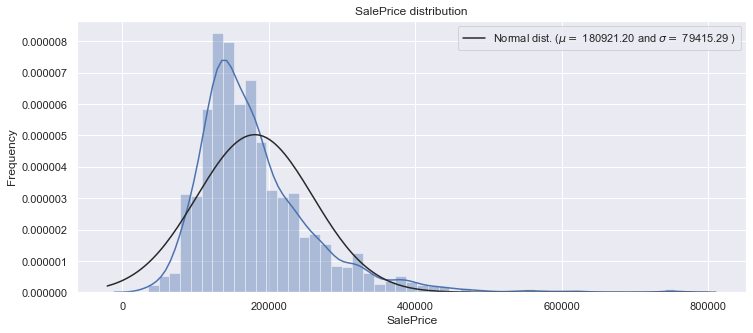

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution');

### Let's logarithm the value of the house

In [17]:
train_df['SalePrice'] = np.log(train_df['SalePrice'])

In [18]:
ps.DataFrameSummary(train_df[['SalePrice']]).summary().T

,count,mean,std,min,25%,50%,75%,max,counts,uniques,missing,missing_perc,types
SalePrice,1460,12.0241,0.399452,10.4602,11.7751,12.0015,12.2737,13.5345,1460,663,0,0%,numeric


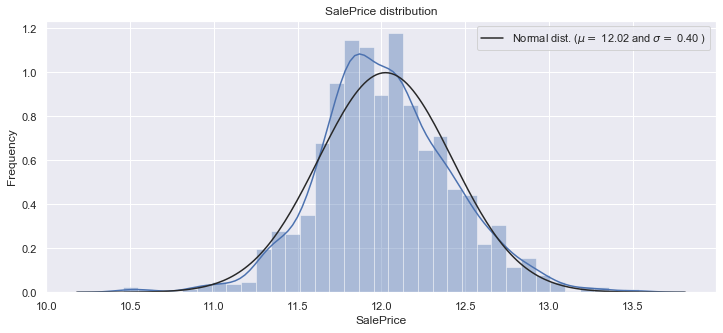

In [19]:
plt.figure(figsize=(12,5))
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution');

In [20]:
y = train_df['SalePrice']
train_df.drop(['SalePrice'], axis=1, inplace=True)

# Check some Null's

In [21]:
def missing_values_table(df, info=True):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        if info:
            print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
                "There are " + str(mis_val_table_ren_columns.shape[0]) +
                  " columns that have missing values.")
        return mis_val_table_ren_columns

In [22]:
missing_values_table(train_df).T

Your selected dataframe has 79 columns.
There are 19 columns that have missing values.


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical
Missing Values,1453.0,1406.0,1369.0,1179.0,690.0,259.0,81.0,81.0,81.0,81.0,81.0,38.0,38.0,37.0,37.0,37.0,8.0,8.0,1.0
% of Total Values,99.5,96.3,93.8,80.8,47.3,17.7,5.5,5.5,5.5,5.5,5.5,2.6,2.6,2.5,2.5,2.5,0.5,0.5,0.1


In [23]:
missing_values_table(test_df).T

Your selected dataframe has 79 columns.
There are 33 columns that have missing values.


,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageYrBlt,GarageQual,GarageFinish,GarageType,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType1,BsmtFinType2,MasVnrType,MasVnrArea,MSZoning,BsmtFullBath,BsmtHalfBath,Functional,Utilities,GarageCars,GarageArea,TotalBsmtSF,KitchenQual,BsmtUnfSF,BsmtFinSF2,BsmtFinSF1,Exterior2nd,Exterior1st,SaleType
Missing Values,1456.0,1408.0,1352.0,1169.0,730.0,227.0,78.0,78.0,78.0,78.0,76.0,45.0,44.0,44.0,42.0,42.0,16.0,15.0,4.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
% of Total Values,99.8,96.5,92.7,80.1,50.0,15.6,5.3,5.3,5.3,5.3,5.2,3.1,3.0,3.0,2.9,2.9,1.1,1.0,0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


# Drop columns with a lot of NaNs (more than 80%)

In [24]:
miss_df = missing_values_table(train_df)
drops = miss_df[miss_df['% of Total Values'] >80].index.tolist()
train_df.drop(drops, inplace=True, axis=1)
test_df.drop(drops, inplace=True, axis=1)

Your selected dataframe has 79 columns.
There are 19 columns that have missing values.


In [25]:
print('Dropped: ', drops)

Dropped:  ['PoolQC', 'MiscFeature', 'Alley', 'Fence']


In [26]:
del miss_df
gc.collect();

### Categoricals & Numerics columns

In [27]:
dfs = ps.DataFrameSummary(train_df)
cat_cols = dfs.categoricals.tolist() + dfs.bools.tolist()
num_cols = dfs.numerics.tolist()

# Processing categoricals variables

In [28]:
train_df[cat_cols] = train_df[cat_cols].fillna('?')
test_df[cat_cols] = test_df[cat_cols].fillna('?')

## Make mean target encoding for categorical feature

Let us consider the above table (A simple binary classification). 

$$ MeanTargetEnc_i = {((GlobalMean * C) + (Mean_i * Size)) \over (C + Size)} $$

Instead of finding the mean of the targets, we can also focus on median and other statistical correlations….These are broadly called target encodings

In [29]:
class MeanEncoding(BaseEstimator):
    """   In Mean Encoding we take the number 
    of labels into account along with the target variable 
    to encode the labels into machine comprehensible values    """
    
    def __init__(self, feature, C=0.1):
        self.C = C
        self.feature = feature
        
    def fit(self, X_train, y_train):
        
        df = pd.DataFrame({'feature': X_train[self.feature], 'target': y_train}).dropna()
        
        self.global_mean = df.target.mean()
        mean = df.groupby('feature').target.mean()
        size = df.groupby('feature').target.size()
        
        self.encoding = (self.global_mean * self.C + mean * size) / (self.C + size)
    
    def transform(self, X_test):
        
        X_test[self.feature] = X_test[self.feature].map(self.encoding).fillna(self.global_mean).values
        
        return X_test
    
    def fit_transform(self, X_train, y_train):
        
        df = pd.DataFrame({'feature': X_train[self.feature], 'target': y_train}).dropna()
        
        self.global_mean = df.target.mean()
        mean = df.groupby('feature').target.mean()
        size = df.groupby('feature').target.size()
        self.encoding = (self.global_mean * self.C + mean * size) / (self.C + size)
        
        X_train[self.feature] = X_train[self.feature].map(self.encoding).fillna(self.global_mean).values
        
        return X_train

In [30]:
for f in cat_cols:
    me = MeanEncoding(f, C=0.1)
    me.fit(train_df, y)
    train_df = me.transform(train_df)
    test_df = me.transform(test_df)

# Processing numerics variables

### Imputer with median strategy

In [31]:
imputer = Imputer(strategy="median")
imputer.fit(train_df[num_cols])
train_df[num_cols] = imputer.transform(train_df[num_cols])
test_df[num_cols] = imputer.transform(test_df[num_cols])

# Check data again

In [32]:
dfs = ps.DataFrameSummary(train_df)
dfs.summary()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
mean,56.8973,12.0241,69.8637,10516.8,12.0241,12.024,12.024,12.0241,12.024,12.024,12.024,12.024,12.0241,12.0241,12.0241,6.09932,5.57534,1971.27,1984.87,12.024,12.024,12.0242,12.0241,12.024,103.117,12.024,12.0241,12.0241,12.0241,12.0242,12.0241,12.0241,443.64,12.0241,46.5493,567.24,1057.43,12.0242,12.0241,12.0241,12.0242,1162.63,346.992,5.84452,1515.46,0.425342,0.0575342,1.56507,0.382877,2.86644,1.04658,12.024,6.51781,12.0242,0.613014,12.024,12.0241,1978.59,12.0241,1.76712,472.98,12.0241,12.0242,12.0241,94.2445,46.6603,21.9541,3.40959,15.061,2.7589,43.489,6.32192,2007.82,12.0241,12.0241
std,42.3006,0.167074,22.0277,9981.26,0.0225421,0.118295,0.0638344,0.0045875,0.0609349,0.0153278,0.301138,0.0820109,0.0417862,0.0798488,0.127447,1.383,1.1128,30.2029,20.6454,0.0827892,0.0523802,0.169428,0.164931,0.176046,180.731,0.270954,0.0845231,0.219984,0.268426,0.11683,0.150671,0.190447,456.098,0.0828801,161.319,441.867,438.705,0.0708346,0.192814,0.140309,0.123323,386.588,436.528,48.6231,525.48,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.267071,1.62539,0.060877,0.644666,0.222536,0.230866,23.997,0.246452,0.747315,213.805,0.149838,0.151851,0.121814,125.339,66.256,61.1191,29.3173,55.7574,40.1773,496.123,2.70363,1.3281,0.138096,0.143238
min,20,11.1272,21,1300,11.6733,11.9361,11.8111,11.8489,12.0019,12.0206,11.4484,11.7423,11.4634,11.7263,11.5981,1,1,1872,1950,11.7995,11.8456,11.1995,11.5725,11.8544,0,11.3096,11.3159,11.535,11.531,11.1112,11.5477,11.531,0,11.5579,0,0,0,11.178,11.4328,11.4924,11.1953,334,0,0,334,0,0,0,0,0,0,11.5059,2,11.3304,0,11.7402,11.4925,1900,11.4925,0,0,11.4903,11.4925,11.5784,0,0,0,0,0,0,0,1,2006,11.6865,11.5412
25%,20,12.0859,60,7553.5,12.0255,11.9361,12.0227,12.0242,12.0019,12.0206,11.8118,12.0429,12.0259,12.0475,11.9937,5,5,1954,1967,11.9842,12.0192,11.8598,11.8624,11.8929,0,11.838,12.0431,11.8701,11.8109,12.0426,11.9557,11.8815,0,12.0437,0,223,795.75,12.0321,11.8161,12.0611,12.0615,882,0,0,1129.5,0,0,1,0,2,1,11.8106,5,12.0385,0,11.8089,11.7657,1962,11.819,1,334.5,12.0685,12.0705,12.0599,0,0,0,0,0,0,0,5,2007,11.9911,12.005
50%,50,12.0859,69,9478.5,12.0255,11.9361,12.0227,12.0242,12.0019,12.0206,12.0906,12.0429,12.0259,12.0475,11.9937,6,5,1973,1994,11.9842,12.0192,12.0412,11.9948,11.8929,0,11.838,12.0431,11.8701,12.1799,12.0426,11.9557,11.964,383.5,12.0437,0,477.5,991.5,12.0321,12.2076,12.0611,12.0615,1087,0,0,1464,0,0,2,0,3,1,11.8106,6,12.0385,1,12.0086,12.1608,1980,12.1726,2,480,12.0685,12.0705,12.0599,0,25,0,0,0,0,0,6,2008,11.9911,12.005
75%,70,12.0859,79,11601.5,12.0255,12.1634,12.0227,12.0242,12.0274,12.0206,12.1686,12.0429,12.0259,12.0475,12.1827,7,6,2000,2004,11.9842,12.0192,12.2058,12.2096,12.1636,164.25,12.3112,12.0431,12.2616,12.1799,12.0426,12.0948,12.3019,712.25,12.0437,0,808,1298.25,12.0321,12.2076,12.0611,12.0615,1391.25,728,0,1

In [33]:
dfs = ps.DataFrameSummary(test_df)
dfs.summary()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459
mean,57.3783,12.0165,68.6456,9819.16,12.0241,12.0218,12.0278,12.0242,12.0223,12.0231,12.0109,12.0245,12.0252,12.0213,12.021,6.07882,5.5538,1971.36,1983.66,12.0207,12.0211,12.0194,12.0225,12.022,99.6737,12.0245,12.0192,12.0256,12.0228,12.016,12.0224,12.0255,439.166,12.0241,52.5833,554.242,1046.08,12.0295,12.0272,12.0217,12.0254,1156.53,325.968,3.54352,1486.05,0.433859,0.0651131,1.57094,0.377656,2.85401,1.04249,12.0229,6.3852,12.0245,0.58122,12.0083,12.026,1977.84,12.022,1.76628,472.774,12.0175,12.0243,12.0118,93.1748,48.3139,24.2433,1.79438,17.0644,1.74435,58.1679,6.10418,2007.77,12.0221,12.0225
std,42.7469,0.179835,20.5618,4955.52,0.0225498,0.116629,0.0668134,4.88733e-06,0.0584665,0.012172,0.307696,0.0835512,0.0447142,0.0836372,0.123354,1.43681,1.11374,30.3901,21.1305,0.0807294,0.0271268,0.173394,0.16617,0.175049,177.002,0.277266,0.0996821,0.223085,0.28025,0.128956,0.154976,0.194493,455.114,0.0875797,176.699,437.115,442.749,0.0391248,0.192437,0.144399,0.120574,398.166,420.61,44.0433,485.566,0.530527,0.252307,0.55519,0.503017,0.829788,0.208472,0.26701,1.50889,0.0583355,0.64742,0.219738,0.230069,25.7196,0.247341,0.775703,216.974,0.154295,0.151453,0.140217,127.745,68.8834,67.2278,20.2078,56.6098,30.4916,630.807,2.72243,1.30174,0.137813,0.142122
min,20,11.1272,21,1470,11.6733,11.9361,11.8111,12.0241,12.0019,12.0206,11.4484,11.7423,11.5917,11.7263,11.5981,1,1,1879,1950,11.7995,12.0192,11.1995,11.5725,11.8544,0,11.3096,11.3159,11.535,11.531,11.1112,11.5477,11.531,0,11.5579,0,0,0,11.178,11.4328,11.4924,11.4654,407,0,0,407,0,0,0,0,0,0,11.5059,3,11.3304,0,11.7402,11.4925,1895,11.4925,0,0,11.4903,11.4925,11.5784,0,0,0,0,0,0,0,1,2006,11.6865,11.5412
25%,20,12.0859,60,7391,12.0255,11.9361,12.0227,12.0242,12.0019,12.0206,11.8118,12.0429,12.0259,12.0475,11.9937,5,5,1953,1963,11.9842,12.0192,11.8598,11.8624,11.8929,0,11.838,12.0431,11.8701,11.8109,12.0426,11.9557,11.8815,0,12.0437,0,219.5,784,12.0321,11.8161,12.0611,12.0615,873.5,0,0,1117.5,0,0,1,0,2,1,11.8106,5,12.0385,0,11.8089,11.7657,1960.5,11.819,1,318,12.0685,12.0705,12.0599,0,0,0,0,0,0,0,4,2007,11.9911,12.005
50%,50,12.0859,69,9399,12.0255,11.9361,12.0227,12.0242,12.0019,12.0206,11.9341,12.0429,12.0259,12.0475,11.9937,6,5,1973,1992,11.9842,12.0192,11.9519,11.9948,11.8929,0,11.838,12.0431,11.8701,11.8109,12.0426,11.9557,11.964,351,12.0437,0,460,988,12.0321,12.2076,12.0611,12.0615,1079,0,0,1432,0,0,2,0,3,1,11.8106,6,12.0385,0,11.8089,12.1608,1980,12.1726,2,480,12.0685,12.0705,12.0599,0,28,0,0,0,0,0,6,2008,11.9911,12.005
75%,70,12.0859,78,11517.5,12.0255,12.1634,12.0227,12.0242,12.0274,12.0206,12.1686,12.0429,12.0259,12.0475,12.1827,7,6,2001,2004,11.9842,12.0192,12.2058,12.2096,12.1636,162,12.3112,12.0431,12.2616,12.1799,12.0426,12.0948,12.3019,752,12.0437,0,797.5,1304,12.0321,12.2076,12.0611,12.0615,1382.5,676,0,1721

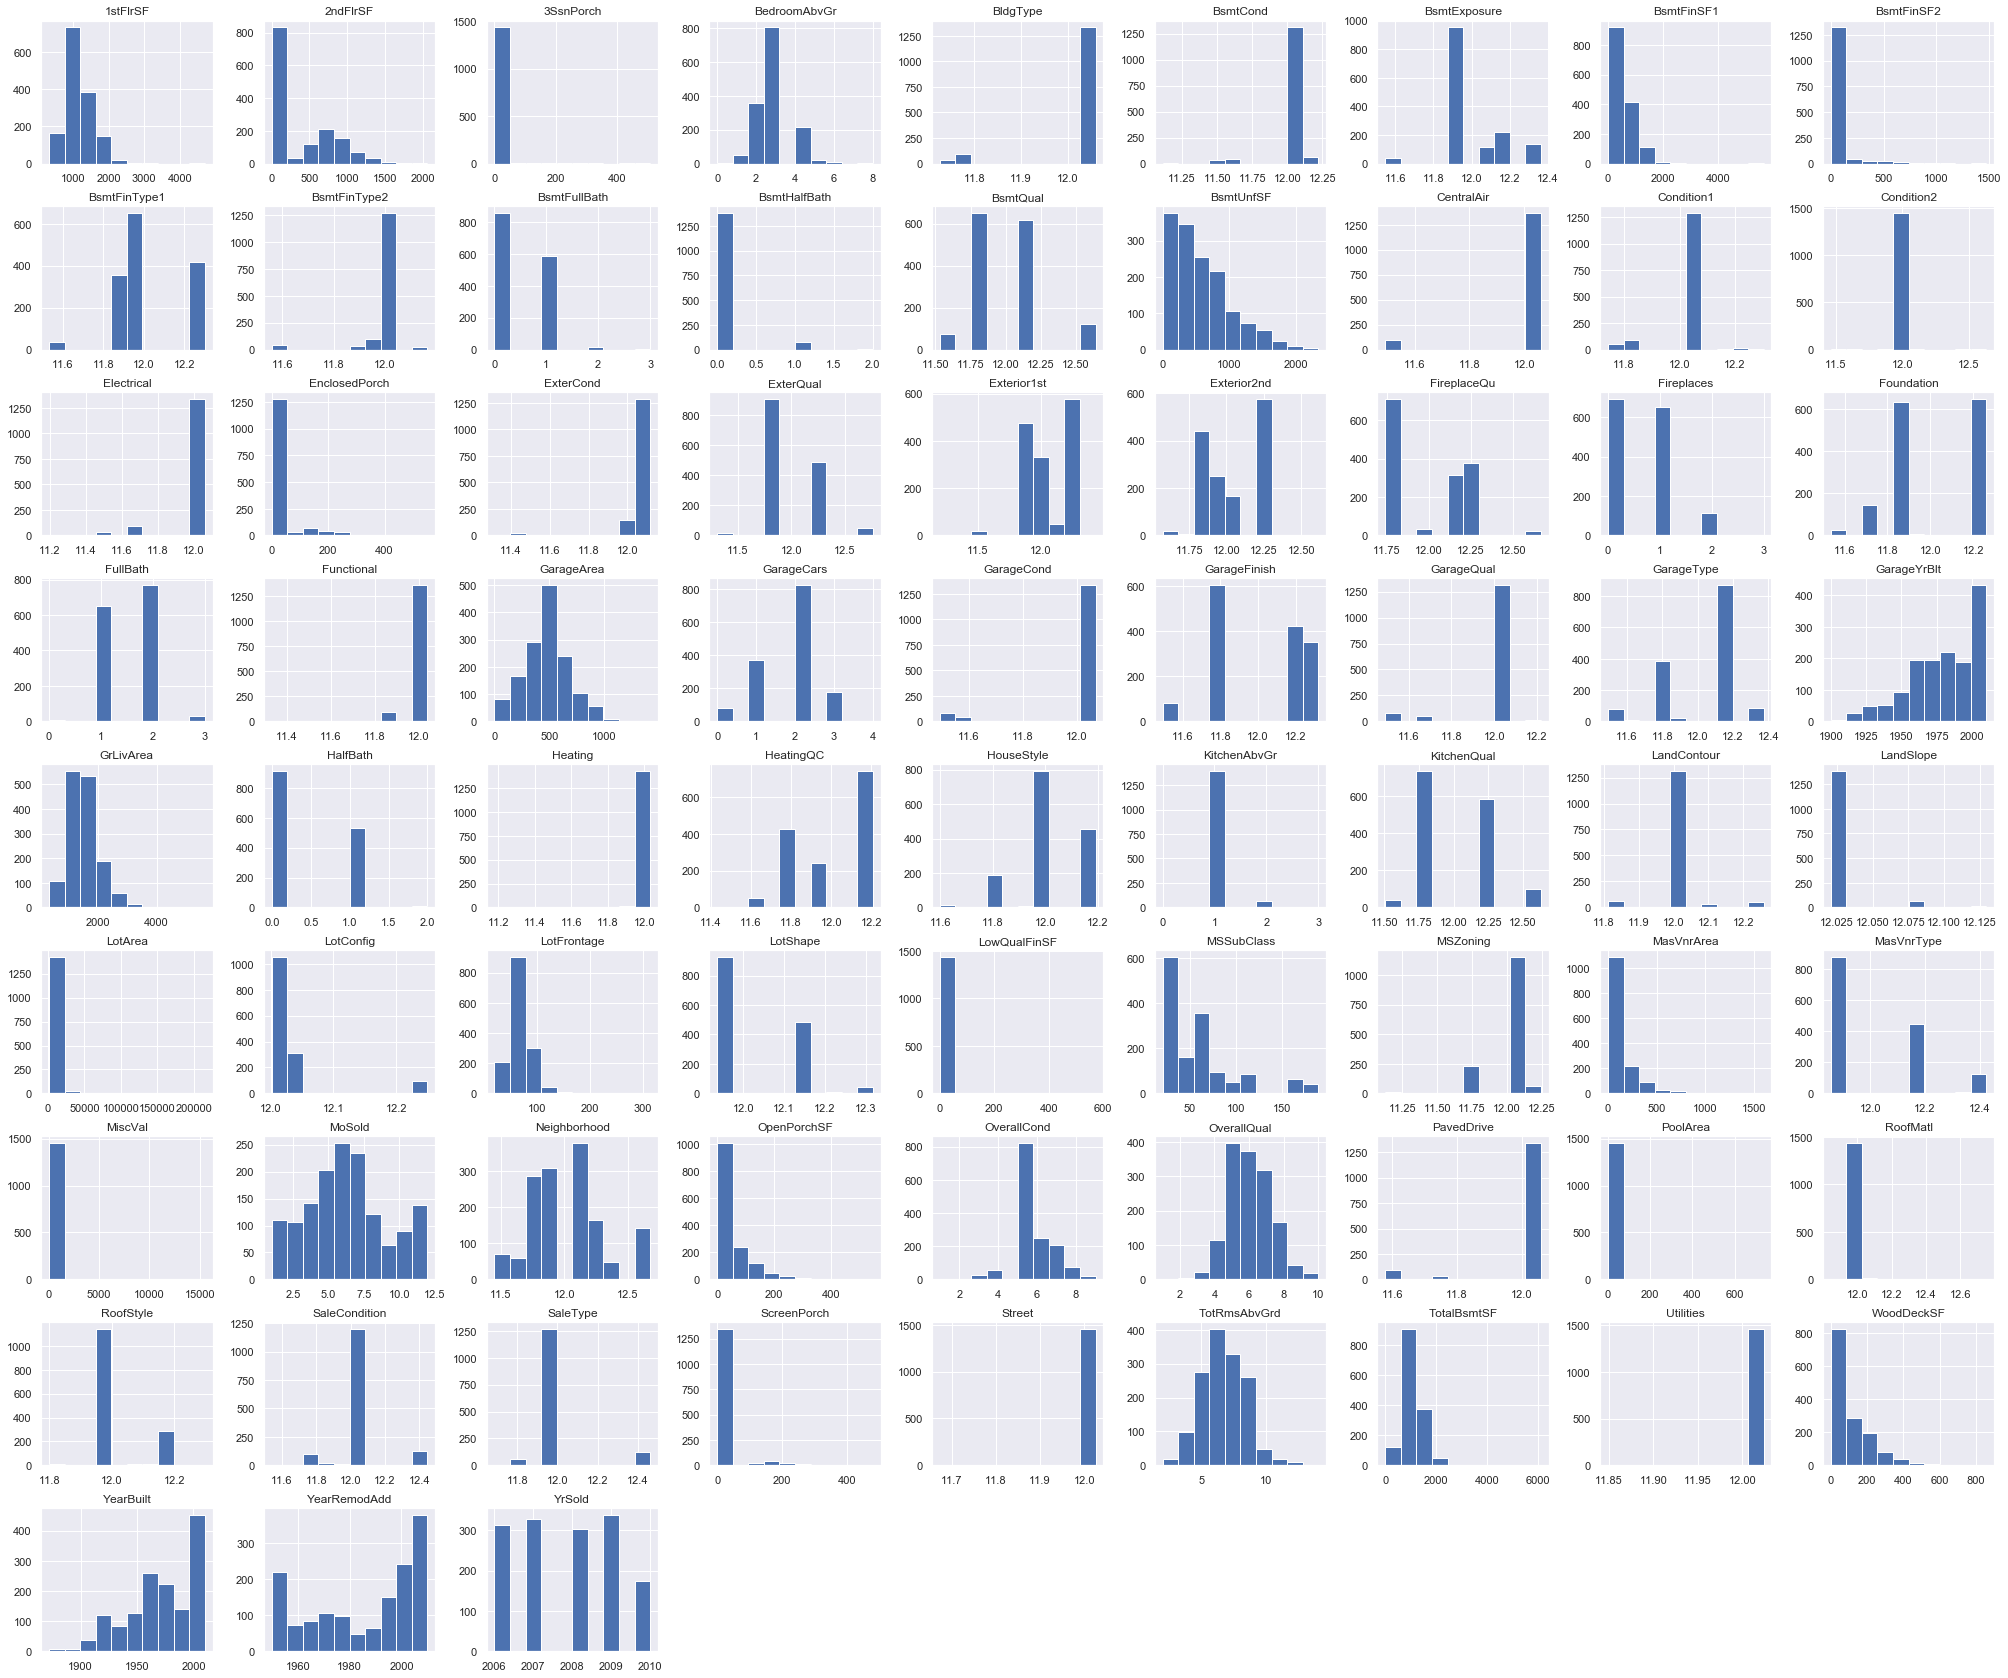

In [34]:
train_df.hist(figsize=(35, 30));

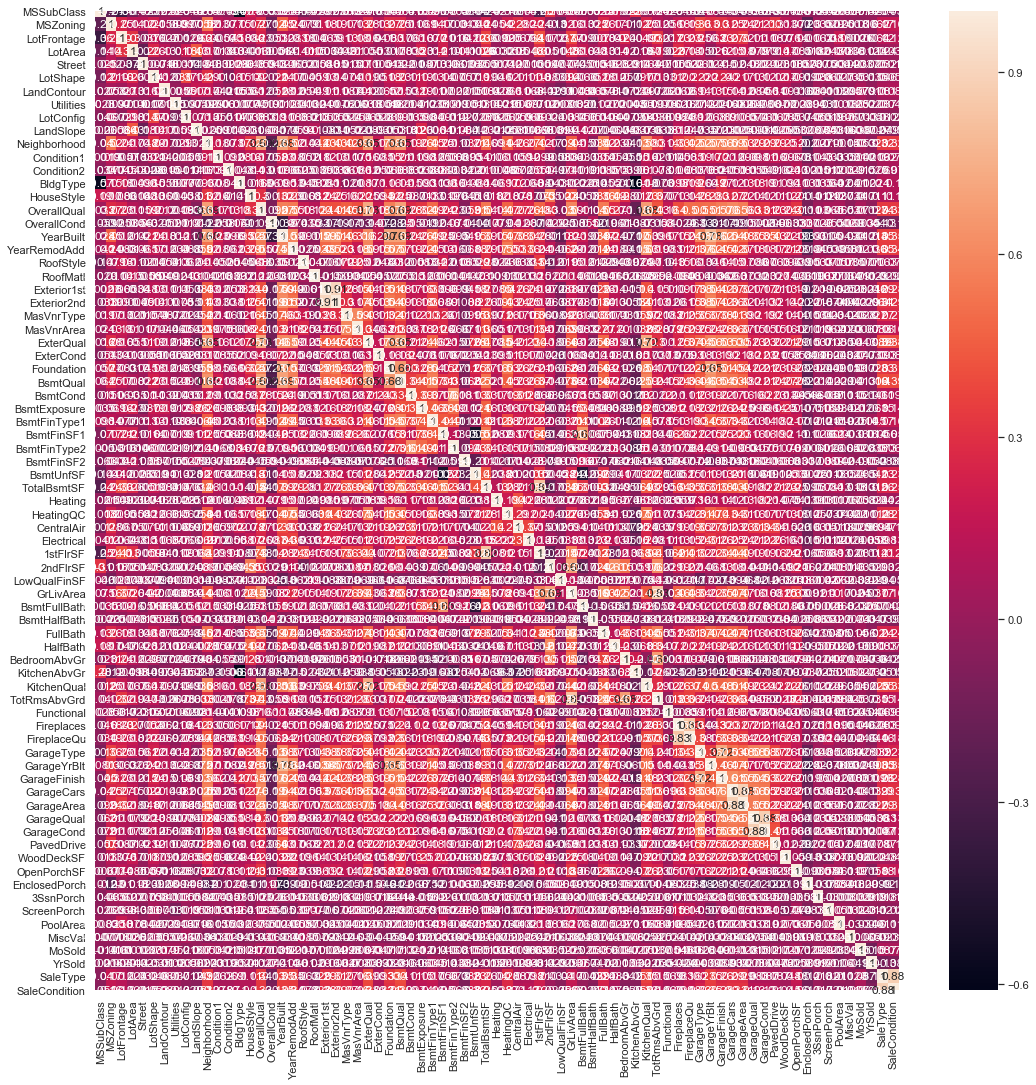

In [35]:
train_corr = train_df.corr()
# plot the heatmap and annotation on it
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(train_corr, xticklabels=train_corr.columns, yticklabels=train_corr.columns, annot=True, ax=ax);

### Ooops :)

In [36]:
high_corr = pd.DataFrame(train_corr[(train_corr > 0.8) & (train_corr != 1)].fillna(0).sum(axis=0))
high_corr[high_corr[0]>0]

,0
Exterior1st,0.908370
Exterior2nd,0.908370
TotalBsmtSF,0.819530
1stFlrSF,0.819530
GrLivArea,0.825489
TotRmsAbvGrd,0.825489
Fireplaces,0.834082
FireplaceQu,0.834082
GarageCars,0.882475
GarageArea,0.882475


## Select columns with high correlation  to drop

In [37]:
drops = ['Exterior2nd', '1stFlrSF', 'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageCond', 'SaleType']
train_df.drop(drops, inplace=True, axis=1)
test_df.drop(drops, inplace=True, axis=1)

# Fit

Regression models are the simplest and at the same time effective machine learning models that give interpretable results.
However, using ready-made implementations from popular libraries, such as Scikit-Learn, with little thought about what is happening under the hood, this is one thing.
But to implement all the features of these algorithms with your own code is completely different.

In this project work, I plan to thoroughly understand the theoretical foundations of regression models (including regularized ones), how to optimize them (analytical solutions, various gradient descent implementations), implement these algorithms myself and compare them with the implementation in Scikit-Learn.

In the framework of this work, regression models will be considered that are used to predict continuous random variables (logistic regression is not considered).

A large amount of time was devoted more to the engineering task - preparing a dataset with weather data for 6 years, on the basis of which a real customer (agricultural holding) would like to predict yield. Due to the fact that the data are not complete, they had to be enriched with data from open sources.
On the part of this data, we will check the models under consideration.

# Linear regression models without regularization

### Linear Regression


___Linear regression calculates the weighted sum of input values (feature values) and free term .___

__The formula for predicting linear regression in the analytical form:__

$$\hat{y}_k = \theta_0 + \theta_1 x_{1}^{(k)} + \theta_2 x_{2}^{(k)} + ... + \theta_i x_{i}^{(k)} + ... + \theta_m x_{m}^{(n)}$$

Where:

$\hat{y}_k$ - calculated value obtained from the $k$ - observation vector using the model;

$\theta_i$ - value of the $i- parameter of the model;

$x_{i}^{(k)}$ - the value of the $i$- characteristic of the $k$- vector of the $X$ matrix of size $n$*$(m+1)$. 

___There are 2 types of training for this model:___
    
- the use of a direct equation in an analytical form that directly calculates the model parameters that are most suitable for a particular data set.
- application of the gradient descent method, which iteratively selects the model parameters, reducing the values of the loss function.

___Everything is clear with the model. How to train it? To teach this means to set her such parameters with which she will most accurately predict the values of the target variable on the training data .___

___What does "predict as accurately as possible" mean? What measure can be used?___

___There are many ways to measure the deviation of forecast values from real values. It is necessary to somehow evaluate the differences between the forecast and real values (residuals).
Here are some of the ways:___
    
__1. Summarize leftovers__

`Advantages`: easy to understand.

`Disadvantages`: terms with opposite signs can cancel each other and we will not receive information about the actual size of the deviation.

$$\sum_{k=1}^{n} (\hat{y}_k - y_k)$$

__2. Sum the remainder modules and divide by the number of forecasts__

`Advantages`: works if errors are distributed abnormally, easy to calculate.

`Disadvantages`: does not work, if the errors are distributed normally, the function of the sum of modules is not differentiable at zero.

$$\sum_{k=1}^n |\hat{y}_k - y_k|$$

_3. Sum the squares (or other positive even degrees) of the residuals and divide by the number of predictions__

ʻAdvantages`: it works regardless of the distribution of errors, the sum of squares function is differentiable.

`Disadvantages`: it is possible to use only positive even degrees, it is more difficult to calculate than the difference (the absolute value of the difference), in the presence of outliers the error value can“ explode ”, with an error value of 1 it is always 1 (1 to any degree is 1), large degrees are difficult to calculate.

$$\sum_{k=1}^n (\hat{y}_k - y_k)^2$$

__The choice of the loss function affects the result of our efforts to select the best parameters (coefficients $\theta$) .__

__As a rule, the value of the sum of losses (squared or modules, it doesn’t matter) is normalized to the number of observations (divided by the number of observations) to obtain the average value.__

__We will analyze the most common criteria.__

__Mean Absolute Error - MAE (Mean Absolute Error):__

$$ MAE(X,h_\theta) = \frac{1}{n}\sum_{k=1}^n |\hat{y}_k - y_k|$$

__Mean Squared Error - MSE (RMS Error):__

$$MSE(X,h_\theta) = \frac{1}{n}\sum_{k=1}^n (\theta^T X_k - y_k)^2 = \frac{1}{n}\sum_{k=1}^n (h_\theta(X_k) - y_k)^2$$

__Root Mean Squared Error - RMSE (square root of root mean square error):__

$$RMSE(X,h_\theta) = \sqrt{\frac{1}{n}\sum_{k=1}^n (h_\theta(X_k) - y_k)^2}$$

__$R^2$ (Share of predicted fluctuations in the total number of fluctuations in the data):__

$$R^2 (X,h_\theta) = 1 - \frac{\sum_{k=1}^n (h_\theta(X_k) - y_k)^2}{\sum_{k=1}^n (h_\theta(X_k) - \bar{y})^2} = 1 - \frac{RSS}{TSS}$$

In [38]:
# scale data
scaler = StandardScaler().fit(train_df)
# train_df = pd.DataFrame(scaler.transform(train_df), columns=train_df.columns)
# test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)
train_df = scaler.transform(train_df)
test_df = scaler.transform(test_df)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=0.2, random_state=10)

We got some values of the coefficients $\theta$, but we understand that they are obtained from data in which there is noise.

In [40]:
# add a unit column to the left of the observation matrix (theta zero parameter will be multiplied by 1)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
theta_best_analytic = np.linalg.inv(X_train_with_c.T.dot(X_train_with_c)).dot(X_train_with_c.T).dot(y_train)
pd.DataFrame(theta_best_analytic).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.221771e+12,-2.526761e+12,-1.639724e+13,1.182638e+13,3.806341e+12,1.016590e+12,-1.877763e+12,-1.007148e+13,-3.349189e+12,-2.926770e+11,-2.810878e+12,1.157890e+13,3.324162e+12,-5.446760e+11,1.226611e+13,1.908761e+13,-3.473941e+13,-6.172581e+12,-3.088931e+12,2.841523e+12,-8.971984e+12,-7.405041e+11,5.507266e+12,-2.955738e+12,-4.798986e+12,-2.482034e+12,6.914783e+11,-1.330768e+13,-2.168197e+13,1.874974e+13,4.422791e+13,3.157651e+13,4.281480e+15,-6.357099e+13,1.147735e+15,3.975821e+15,-4.182012e+15,-0.183162,0.560738,-0.223679,0.705964,-2.368356,-0.10649,2.286406,0.841417,0.335473,0.493673,0.712908,-0.769594,-0.975769,0.423069,0.217551,-0.010533,0.265781,-0.91147,-0.256783,1.726889,-1.575567,0.25628,-0.277038,0.092414,-0.107543,-0.018626,-0.040842,0.569737,0.02538,0.455367,0.054655,-0.041153


Now you can use our trained model for forecasts. Take the points from the test set and make a prediction.

In [41]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_simple = X_test_with_c.dot(theta_best_analytic)

Compare the result (y_pred) with real data (y_test).

We measure the RMSE indicator for our own implementation:

In [42]:
all_metrics.append(['analytical_solution', mean_squared_error(y_test, y_pred_simple)])
mean_squared_error(y_test, y_pred_simple)

1.8250981558471048e+29

Compare our implementation of the algorithm with the LinearRegression method implemented in sklearn

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's measure the RMSE for sklearn:

In [44]:
all_metrics.append(['sklearn_LR', mean_squared_error(y_test, lr.predict(X_test))])
mean_squared_error(y_test, lr.predict(X_test))

0.01777161187639058

This method (calculating the coefficients by solving the normal equation) has one drawback: with a large number of signs, the computational complexity reaches $O(n^3)$. Therefore, we will not apply this approach on a full weather dataset, where up to 800+ predictors are assumed.

Therefore, for real-world problems with hundreds and thousands of features, an approach with iterative optimization of parameters is used - Gradient Descent.

#### Testing the linear regression model for compliance with the criteria of the Gauss-Markov theorem:

A data model is correctly specified if the data has the following properties:

1. All $X_k$ are deterministic and not all are equal to each other (the matrix $X$ is deterministic, it contains real observations - the vectors $X_k$);

2. Model errors are not systematic, that is, the mathematical expectation of model errors is $ M [u] = 0 $, the variance of model errors is constant and equal to $Var[u]=\sigma^2$;

3. Errors are uncorrelated, that is, $M[u_i, u_j]=0 $ when $i$ is not equal to $j$ (pairwise correlation is zero).

__Then under these conditions the least-squares estimates are optimal in the class of linear unbiased estimates, in other words $\hat{\theta}=(X^TX)^{-1}X^Ty$ is the best estimate possible .__

In [45]:
# error expectation
MU = np.round(np.sum((y_test - lr.predict(X_test)))/y_test.shape[0], 5)
MU

0.00679

In [46]:
# error variance
VAR = ((y_test - lr.predict(X_test)) - np.mean(y_test - lr.predict(X_test))).mean()
VAR

3.8021336459765633e-19

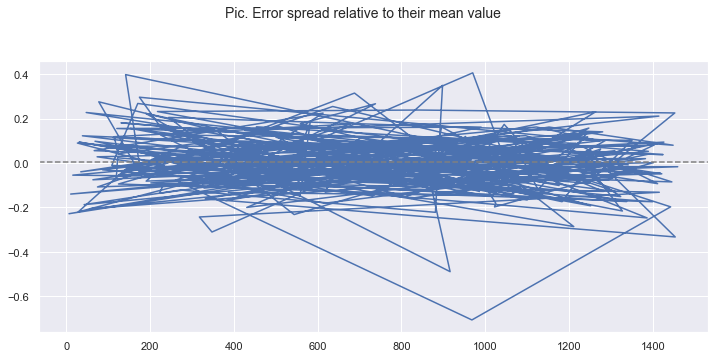

In [47]:
# error variance is not generally constant
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(((y_test - lr.predict(X_test)) - np.mean(y_test - lr.predict(X_test))))
fig.suptitle("Pic. Error spread relative to their mean value", \
            fontsize = 14, y = 1.03)
ax.axhline(y=MU, color='grey', ls='--');

We will write a function that will take pairs from the array with errors many times and at the end will calculate the expectation.

In [48]:
def sample_corr(arr, it=10000):
    arr = arr.values.reshape(-1,1)
    val_list = []
    for iti in range(it):
        random_index = list(set(np.random.randint(arr.shape[0], size=2)))
        val_list.append(np.sum(arr[random_index, :]))
        
    return np.mean(val_list)

In [49]:
sample_corr((y_test - lr.predict(X_test)))

0.015503961356606867

# Gradient Descent

__The principle of the gradient descent method is to move along a function from some random point in the direction of the anti-gradient. At the same time, the step size (learning rate) is very important, which, if too large, will not allow us to step to the minimum, and if too small, we will go down to the minimum for a very long time .__

__If the signs have different scales, then the algorithm may converge slowly. We recommend scaling data before applying gradient descent .__

#### Batch gradient descent

To implement gradient descent in the case of a function with the number of parameters $\theta$ $i$>=2, you need to calculate the gradient (the vector of partial derivatives for each parameter $\theta_i$. The gradient shows how much the function changes (increases or decreases) with a small step over all $\theta$.

For the MSE loss function, the partial derivative with respect to $\theta_i$ will look like this:

$$MSE(X,h_\theta)_i' = \frac{d}{d\theta_i} MSE(X,h_\theta) = 
(\frac{1}{n}\sum_{k=1}^n (h_\theta(X_k) - y_k)^2)' =  (\frac{1}{n}\sum_{k=1}^n (\theta^T X_k - y_k)^2)' = 
\frac{2}{n}\sum_{k=1}^n (\theta^T X_k - y_k) \sum_{k=1}^m x_{i}^{(k)}$$ 

__Gradient (matrix of partial derivatives of the loss function for each parameter from $\theta_0$ to $\theta_i$) of the loss function $MSE$ will look like this:__

$$
grad_\theta MSE(X,h_\theta) = 
\left(\begin{array}{cc} 
\frac{d}{d\theta_0} MSE(X,h_\theta) \\
\frac{d}{d\theta_1} MSE(X,h_\theta) \\
... \\
\frac{d}{d\theta_i} MSE(X,h_\theta) \\
... \\
\frac{d}{d\theta_m} MSE(X,h_\theta)
\end{array}\right)
= \frac{2}{n} X^T (X  \theta^T - y)
$$ 

The algorithm is called __*batch gradient descent*__, because at each step it works with a complete package of training data. For real data sets, such an algorithm will work rather slowly.

Having calculated the gradient (the direction of the maximum growth of the function), we must take a “step” in the opposite direction (along the anti-gradient).
At the first step, from the randomly initialized parameters $\theta$ we subtract the obtained gradient and update the coefficient values in the vector $\theta$, at the next step we subtract the last calculated gradient from the most recent vector $\theta$, and so many, many times. In order to somehow normalize the step, we need to introduce
another coefficient is $\mu$, by which we will multiply the gradient. The $\mu$ parameter is called the __learning rate__.

__Calculation of the next step of the gradient descent:__

$$\theta^{next} = \theta^{current} - \mu grad_\theta MSE(X,h_{\theta^{current}})$$

Where:

$\theta^{current}$ - current value of the coefficient vector $\theta$;

$\theta^{next}$ - the following value of the coefficient vector $\theta$;

$MSE(X,h_{\theta^{current}})$ - value $MSE$ for function $h$ with the current set of coefficients $\theta$, which the observation matrix is passed as an argument $X$;

$\mu$ - learning speed.

`Advantages`: the algorithm allows you to find parameters not only in the case of linear regression (for which you can find these parameters analytically), but also for many other models, including neural networks. This advantage applies to all the options for implementing the gradient descent method listed in this paper.

`Disadvantages`: you need to carefully select the learning speed, for better convergence, you need to scale the data before applying the algorithm. Both of the latter drawbacks apply to all the options for implementing the gradient descent method listed in this paper.

__Now we will test this algorithm in practice. We have already created the training data. We write a function for gradient descent and then generate new points and make a forecast .__

In [50]:
def gradient_descent(mu, x, y, params, numIterations, lf='MSE', prnt=False):
    """
     The function implements a batch gradient descent algorithm.
     mu - learning rate
     params - number of parameters, including free parameter
     numIterations - number of iterations (int)
     prnt - whether or not to print the calculation, if prnt = True, 
     then at every hundredth step the value of the loss function is displayed
     lf - loss function, default 'MSE', you can select 'MAE'
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1. 1.] - начальные значения коэффициентов пусть будут равны 1
    x_transpose = x.transpose() # транспонированная матрица x
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # матричное произведение
        loss = hypothesis - y.values.reshape(len(y),1) # значение остатка
        
        if lf=='MSE':
            J = np.sum(loss ** 2) / n  # функция потерь (квадраты)
            if prnt and (iter % 10000)==0:
                print( "iter %s | MSE: %.3f" % (iter, J) )
        
        elif lf=='MAE':
            J = np.sum(abs(loss)) / n  # функция потерь (модули)
            if prnt and (iter % 10000)==0:
                print( "iter %s | MAE: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) * 2 / n         
        theta = theta - mu * gradient  # update
    
    return (theta)

In [51]:
%%time
# add a unit column to the left of the observation matrix (theta zero parameter will be multiplied by 1)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
# run the gradient descent algorithm

theta_best_gd = gradient_descent(0.0001, X_train_with_c, y_train, params=X_train_with_c.shape[1], numIterations=100000, lf='MSE', prnt=True)

iter 0 | MSE: 607.560
iter 10000 | MSE: 3.223
iter 20000 | MSE: 0.255
iter 30000 | MSE: 0.085
iter 40000 | MSE: 0.046
iter 50000 | MSE: 0.030
iter 60000 | MSE: 0.023
iter 70000 | MSE: 0.020
iter 80000 | MSE: 0.018
iter 90000 | MSE: 0.017
Wall time: 18.2 s


In [52]:
# received parameters (gradient descent)
pd.DataFrame(np.round(theta_best_gd, 3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,12.023,-0.004,0.026,-0.001,0.012,0.009,-0.002,0.008,0.008,0.01,0.009,0.068,0.023,-0.009,0.021,-0.021,0.083,0.052,0.032,0.008,0.011,0.012,0.015,0.007,-0.001,0.001,0.006,0.01,0.015,-0.009,0.013,-0.003,0.478,0.001,0.17,0.448,-0.405,-0.001,0.017,0.01,-0.005,0.047,0.01,0.025,-0.002,0.023,0.012,0.017,0.015,0.018,0.033,0.013,0.034,0.0,-0.019,-0.0,0.038,0.014,0.006,0.019,0.005,0.012,0.007,0.021,-0.005,-0.001,-0.001,-0.008,0.014


In [53]:
# received parameters (analytical solution)
pd.DataFrame(np.round(theta_best_analytic, 3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.221771e+12,-2.526761e+12,-1.639724e+13,1.182638e+13,3.806341e+12,1.016590e+12,-1.877763e+12,-1.007148e+13,-3.349189e+12,-2.926770e+11,-2.810878e+12,1.157890e+13,3.324162e+12,-5.446760e+11,1.226611e+13,1.908761e+13,-3.473941e+13,-6.172581e+12,-3.088931e+12,2.841523e+12,-8.971984e+12,-7.405041e+11,5.507266e+12,-2.955738e+12,-4.798986e+12,-2.482034e+12,6.914783e+11,-1.330768e+13,-2.168197e+13,1.874974e+13,4.422791e+13,3.157651e+13,4.281480e+15,-6.357099e+13,1.147735e+15,3.975821e+15,-4.182012e+15,-0.183,0.561,-0.224,0.706,-2.368,-0.106,2.286,0.841,0.335,0.494,0.713,-0.77,-0.976,0.423,0.218,-0.011,0.266,-0.911,-0.257,1.727,-1.576,0.256,-0.277,0.092,-0.108,-0.019,-0.041,0.57,0.025,0.455,0.055,-0.041


## The obtained parameters are very far from those that we obtained analytically.

In [54]:
# take new points from the test sample and apply the coefficients to calculate the function value from them,
# obtained by our gradient descent algorithm
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
y_pred_gd = X_test_with_c.dot(theta_best_gd)

RMSE is also very close to sklearn and far from our analytical solution:

In [55]:
all_metrics.append(['Gradient_Descent', mean_squared_error(y_test, y_pred_gd)])
mean_squared_error(y_test, y_pred_gd)

0.018170897091381533

# Stochastic gradient descent

This modification of the algorithm allows you to bypass the problem that the batch method suffers, namely, the need to work with the entire set of training data.
At each step, the stochastic gradient descent selects one random sample from the training set and calculates the gradient only on the basis of this sample.
This greatly increases the speed of work, but instead of translating to the minimum of the loss function, we will observe a wandering indicator of the loss function, which will decrease only on average.
Having reached a minimum, the algorithm will continue to "rush" in its vicinity. The final values of the parameters $\theta$ will be good, but not optimal.

`Advantages`: the algorithm is computationally cheaper than the batch version, quickly gives good results, in the case of an irregular loss function (with many local extrema), the algorithm has good chances to jump out of a local minimum and get to a deeper local minimum or even to a global one.

`Disadvantages`: the final answer will not be optimal (the algorithm will not stop even if it gets to a minimum), it will most likely just be" good ".

One solution to the latter drawback is to gradually decrease the ___learning rate___. This approach is called ___simulated annealing___. A special function responsible for changing the learning speed is called the ___learning schedule___. As with the selection of the learning rate, there is no exact answer on how to set it, so with the rate of decrease in the learning rate you need to be careful not to stop ahead of time or to jump over the global minimum.

In [56]:
def learning_schedule(val, p1=100, p2=50):
    """The function takes parameters as arguments
    p1 - parameter for the numerator (default is 100),
    p2 - parameter for the denominator (default is 50),
    val - value set by user
    and returns a simple conversion
    return p1/(p2 + val)
    """
    return p1/(p2 + val)

In [57]:
def st_gradient_descent(x, y, params, num_epochs, num_iter, lf='MSE', prnt=False):
    """
     The function implements the stochastic gradient descent algorithm.
     mu - learning rate
     params - number of parameters, including free parameter
     num_epochs - number of eras
     num_iter - the number of iterations (int) in the era
     prnt - print or not calculations every 100 iterations
     lf - loss function, default 'MSE', you can select 'MAE'
     Without the learning_schedule () function, it won’t work.
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1.  1.] - начальные значения коэффициентов пусть будут равны 1
    y = y.values.reshape(-1,1)
    lr=0.0001
    for epoch in range(num_epochs):
        for iteration in range(num_iter):
            random_index = np.random.randint(n)
            x_rand = x[random_index, :].reshape(1, params)
            y_rand = y[random_index, :]

            hypothesis = np.dot(x_rand, theta) # матричное произведение
            loss = hypothesis - y_rand.reshape(-1,1) # значение остатка

            if lf=='MSE':
                J = np.sum(loss ** 2) / n  # функция потерь (квадраты)
                if prnt and (iteration % 10000)==0:
                    print( "epoch %s | iter %s | MSE: %.3f" % (epoch, iteration, J) )

            elif lf=='MAE':
                J = np.sum(abs(loss)) / n  # функция потерь (модули)
                if prnt and (iteration % 10000)==0:
                    print( "iter %s | MAE: %.3f" % (iteration, J) )

            gradient = np.dot(x_rand.transpose(), loss) * 2 / n  
            lr = learning_schedule(val=100, p1=1, p2=10000)
            
            theta = theta - lr * gradient  # update
    
    return (theta)

Let's run our algorithm for 100 epochs with 2000 iterations (only 100,000 times) and measure the execution time.

In [58]:
%%time
theta_best_sgd = st_gradient_descent(X_train_with_c, y_train, params=X_train_with_c.shape[1], num_epochs=100, num_iter=2000, lf='MSE', prnt=True)

epoch 0 | iter 0 | MSE: 0.079
epoch 1 | iter 0 | MSE: 0.295
epoch 2 | iter 0 | MSE: 1.134
epoch 3 | iter 0 | MSE: 0.006
epoch 4 | iter 0 | MSE: 1.364
epoch 5 | iter 0 | MSE: 0.250
epoch 6 | iter 0 | MSE: 0.006
epoch 7 | iter 0 | MSE: 0.445
epoch 8 | iter 0 | MSE: 0.316
epoch 9 | iter 0 | MSE: 0.040
epoch 10 | iter 0 | MSE: 0.435
epoch 11 | iter 0 | MSE: 0.300
epoch 12 | iter 0 | MSE: 0.042
epoch 13 | iter 0 | MSE: 0.022
epoch 14 | iter 0 | MSE: 0.037
epoch 15 | iter 0 | MSE: 0.004
epoch 16 | iter 0 | MSE: 0.618
epoch 17 | iter 0 | MSE: 0.703
epoch 18 | iter 0 | MSE: 0.023
epoch 19 | iter 0 | MSE: 0.220
epoch 20 | iter 0 | MSE: 0.001
epoch 21 | iter 0 | MSE: 0.268
epoch 22 | iter 0 | MSE: 0.180
epoch 23 | iter 0 | MSE: 0.304
epoch 24 | iter 0 | MSE: 0.000
epoch 25 | iter 0 | MSE: 0.020
epoch 26 | iter 0 | MSE: 1.542
epoch 27 | iter 0 | MSE: 0.053
epoch 28 | iter 0 | MSE: 0.007
epoch 29 | iter 0 | MSE: 0.223
epoch 30 | iter 0 | MSE: 0.495
epoch 31 | iter 0 | MSE: 0.027
epoch 32 | iter 0 

In [59]:
# received parameters (SGD)
pd.DataFrame(np.round(theta_best_sgd, 3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.355,1.019,0.761,0.763,0.821,0.974,0.776,0.863,0.969,0.868,0.93,0.55,0.861,0.893,0.862,0.745,0.521,1.049,0.575,0.611,0.853,0.899,0.712,0.707,0.73,0.564,0.845,0.599,0.545,0.746,0.704,0.653,0.766,0.79,0.98,0.862,0.61,0.855,0.689,0.764,0.734,0.817,1.032,0.849,0.962,0.644,0.788,0.909,1.097,0.584,0.712,0.889,0.692,0.61,0.628,0.586,0.603,0.758,0.77,0.771,0.779,1.11,0.939,0.94,0.915,0.974,0.93,0.992,0.776


`Comment:` as time measurement showed, stochastic gradient descent is faster than burst. Both implementations in the above examples updated $\theta$ parameters 100,000 times.

In [60]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
y_pred_sgd = X_test_with_c.dot(theta_best_sgd)

In [61]:
all_metrics.append(['Stochastic_Gradient_Descent', mean_squared_error(y_test, y_pred_sgd)])
mean_squared_error(y_test, y_pred_sgd)

388.5697770011888

Compare with a similar method from the sklearn library:

In [62]:
sgd_reg = SGDRegressor(max_iter=100000, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_train_with_c, y_train.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=100000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [63]:
print('Parameters returned by SGDRegressor from the sklearn library:')
theta_best_sgd_sklearn = np.array(sgd_reg.coef_)
pd.DataFrame(np.round(theta_best_sgd_sklearn, 3)).T

Parameters returned by SGDRegressor from the sklearn library:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,5.193783e+09,5.414509e+09,-1.318687e+10,2.309710e+10,2.055053e+10,-4.783547e+10,3.475659e+10,-6.578363e+09,2.615459e+11,2.071177e+10,3.615996e+10,1.976836e+09,-1.066821e+10,-1.083995e+10,-2.401660e+10,-1.739858e+10,1.493283e+10,1.094828e+10,-2.796897e+09,8.637353e+09,-1.718216e+09,3.317887e+09,-2.101190e+10,-2.032637e+10,-1.740475e+10,-1.647037e+10,1.489757e+10,-6.409491e+09,1.300642e+10,-2.989379e+08,1.305738e+10,-1.183501e+10,3.026127e+10,-1.415831e+09,2.112445e+10,-8.597068e+09,3.056979e+10,1.864790e+10,-8.648704e+09,-2.594679e+10,-2.373588e+09,4.424791e+10,-5.394270e+09,-5.911472e+09,8.685829e+09,7.244556e+08,-9.920268e+09,-6.938735e+09,-2.203962e+10,2.461594e+09,1.355330e+10,-8.372704e+09,-7.794300e+09,-1.079176e+10,-7.777634e+09,2.031830e+09,-1.730129e+10,-2.723512e+09,1.073764e+10,4.667907e+09,8.510634e+09,6.756629e+09,7.271208e+09,-1.070405e+10,-2.125766e+10,1.335675e+10,1.207902e+10,-1.148334e+10,-2.461107e+10


In [64]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
y_pred_sk_sgd = X_test_with_c.dot(theta_best_sgd_sklearn)

In [65]:
all_metrics.append(['Sklearn_Stochastic_Gradient_Descent', mean_squared_error(y_test, y_pred_sk_sgd)])
mean_squared_error(y_test, y_pred_sk_sgd)

2.1446755151823914e+22

`Comment:` The sklearn implementation works much more efficiently in terms of computation speed and accuracy (RMSE parameter).

### Mini batch gradient descent

This modification of the algorithm combines the features of a batch and stochastic implementation.
The mini batch gradient descent calculates gradients on small randomly sampled data samples (__mini-batch__).
The larger the package, the less the wandering of the algorithm with respect to the shortest path from the starting point to the local minimum.
In general, the mini-batch gradient descent is selected closer to the minimum than the stochastic version.
On the other hand, this algorithm is more difficult to get away from local minima, especially when there are a lot of them.
Given a well-chosen training schedule, the mini-batch gradient descent method allows you to reach a minimum faster than the batch version.

`Advantages`: the algorithm is computationally cheaper than the batch version, quickly gives good results, in the case of an irregular loss function (with many local extrema), the algorithm has good chances to jump out of a local minimum and get to a deeper local minimum or even to a global one.

`Disadvantages`: the final answer will not be optimal (the algorithm will not stop even if it gets to a minimum), it will most likely just be" good ".

We write our own implementation of the algorithm.

In [66]:
def mb_gradient_descent(x, y, mu, params, num_epochs, num_iter, batch_size=0.2, lf='MSE', prnt=False):
    """
    The function implements a mini-batch gradient descent algorithm.
    mu - learning rate
    params - number of parameters, including free parameter
    num_iter - the number of iterations (int) in the era
    batch_size - packet size for one iteration
    prnt - print or not computation
    lf - loss function, default 'MSE', you can select 'MAE'
    """
    
    n = x.shape[0] #количество наблюдений в выборке
    theta = np.ones(params).reshape(params,1) # [ 1.  1.  1.] - начальные значения коэффициентов пусть будут равны 1
    y = y.values.reshape(-1,1)
    
    for epoch in range(num_epochs):
        for iteration in range(num_iter):
            random_index = list(set(np.random.randint(200, size=round(n*batch_size)).tolist()))
            x_rand = x[random_index, :].reshape(len(random_index), params)
            y_rand = y[random_index, :]

            hypothesis = np.dot(x_rand, theta) # матричное произведение
            loss = hypothesis - y_rand # значение остатка

            if lf=='MSE':
                J = np.sum(loss ** 2) / n  # функция потерь (квадраты)
                if prnt and (iteration % 10000)==0:
                    print( "epoch %s | iter %s | MSE: %.3f" % (epoch, iteration, J) )

            elif lf=='MAE':
                J = np.sum(abs(loss)) / n  # функция потерь (модули)
                if prnt and (iteration % 10000)==0:
                    print( "iter %s | MAE: %.3f" % (iteration, J) )

            gradient = np.dot(x_rand.transpose(), loss) * 2 / n  
            theta = theta - mu * gradient  # update
    
    return (theta)

Let's run our algorithm for 50 epochs with 2000 iterations (only 100,000 times) and measure the execution time.

In [67]:
%%time
theta_best_mbgs = mb_gradient_descent(X_train_with_c, y_train, mu=0.001, params=X_train_with_c.shape[1], num_epochs=50, num_iter=2000, batch_size=0.2, lf='MSE', prnt=True)
pd.DataFrame(np.round(theta_best_mbgs, 3)).T

epoch 0 | iter 0 | MSE: 73.829
epoch 1 | iter 0 | MSE: 6.007
epoch 2 | iter 0 | MSE: 2.706
epoch 3 | iter 0 | MSE: 1.061
epoch 4 | iter 0 | MSE: 0.480
epoch 5 | iter 0 | MSE: 0.286
epoch 6 | iter 0 | MSE: 0.160
epoch 7 | iter 0 | MSE: 0.107
epoch 8 | iter 0 | MSE: 0.066
epoch 9 | iter 0 | MSE: 0.048
epoch 10 | iter 0 | MSE: 0.042
epoch 11 | iter 0 | MSE: 0.031
epoch 12 | iter 0 | MSE: 0.024
epoch 13 | iter 0 | MSE: 0.021
epoch 14 | iter 0 | MSE: 0.015
epoch 15 | iter 0 | MSE: 0.018
epoch 16 | iter 0 | MSE: 0.011
epoch 17 | iter 0 | MSE: 0.012
epoch 18 | iter 0 | MSE: 0.009
epoch 19 | iter 0 | MSE: 0.009
epoch 20 | iter 0 | MSE: 0.007
epoch 21 | iter 0 | MSE: 0.006
epoch 22 | iter 0 | MSE: 0.006
epoch 23 | iter 0 | MSE: 0.005
epoch 24 | iter 0 | MSE: 0.005
epoch 25 | iter 0 | MSE: 0.004
epoch 26 | iter 0 | MSE: 0.004
epoch 27 | iter 0 | MSE: 0.003
epoch 28 | iter 0 | MSE: 0.003
epoch 29 | iter 0 | MSE: 0.003
epoch 30 | iter 0 | MSE: 0.003
epoch 31 | iter 0 | MSE: 0.002
epoch 32 | iter 0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,11.913,0.044,0.053,0.017,0.012,0.002,0.009,-0.01,1.286,0.008,0.018,0.004,0.025,1.476,0.042,-0.043,0.076,0.095,0.18,-0.028,0.038,-0.002,-0.001,0.025,-0.001,-0.05,0.014,0.057,0.026,-0.019,0.002,-0.017,0.533,-0.032,0.174,0.512,-0.28,-0.01,0.02,0.012,-0.001,0.251,0.029,0.033,-0.002,-0.049,-0.031,0.008,0.047,0.011,-0.059,-0.001,0.017,0.005,-0.03,0.0,0.049,0.016,-0.036,0.01,-0.036,0.02,0.028,0.009,0.006,0.039,-0.008,0.002,0.027


In [68]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
y_pred_mbgs = X_test_with_c.dot(theta_best_mbgs)

In [69]:
all_metrics.append(['Mini_batch_gradient_descent', mean_squared_error(y_test, y_pred_mbgs)])
mean_squared_error(y_test, y_pred_mbgs)

1.4262617738222545

# Linear regression models with regularization

__Regularization__ is the imposition of certain restrictions on the model in order to avoid retraining.

The simplest example of regularization is to use the 2nd degree of the polynomial when generating polynomial features, but the 2nd.
In addition, you can artificially limit the size of the coefficients of the $\theta$ model.

Regularized regression models include:
    
* Ridge regression ($L_2$ -regulation)
* Lasso regression ($L_1$ regularization)
* Elastic network

### Ridge-regression ($L_2$ -regularization, Tikhonov regularization)

The regularization of the model is realized by adding to the loss function *a regularization term*:

$$\alpha \sum_{i=1}^m \theta_i^2$$

Where:

$\alpha$ - normalization parameter, determines how much we regularize the model. With $\alpha=0$, ridge regression becomes just a linear regression. For $\alpha$ close to 1, the model coefficients (weights) tend to zero;

$\theta_i$ - model parameters from $\theta_1$ to $\theta_m$.


`Note to expression`: *the regularization term* is used in conjunction with the loss function __only__ when training the model. When checking the model you need to use an irregular measure of errors. This is also true for the other regularized regression models described below.

The parameter with the free term $\theta_0$ is not regularized

The ridge regression loss function may have the form:

$$ J(\theta) = MSE(X,h_\theta) + \frac{1}{2}\alpha \sum_{i=1}^m \theta_i^2$$

$$ J(\theta) = RMSE(X,h_\theta) + \frac{1}{2}\alpha \sum_{i=1}^m \theta_i^2$$

$\alpha$ - normalization parameter, determines how much we regularize the model. With $\alpha=0$, ridge regression becomes just a linear regression. With $\alpha$ close to 1, the best possible coefficients (weights) of the model tend to zero.

$\theta_i$ - model parameters from $\theta_1$ to $\theta_m$.

`Note to the expression`: $\theta_0$ (parameter with a free term) is not regularized! The sum $\sum_{i = 1}^m$ starts at 1, not 0.

Of the various regularization options, we will use first the formula.

As a result, the vector of coefficients (weights) of the model is formed into a vector of the form:

$$
\frac{1}{2} \alpha 
\left(\begin{array}{cc} 
(\theta_1^2 + \theta_2^2 + ... + \theta_m^2)^{1/2} \\
\theta_1^2 \\
\theta_2^2 \\
... \\
\theta_m
\end{array}\right) 
$$ 

Where:

$(\theta_1^2 + \theta_2^2 + ... + \theta_m^2)^{1/2}$ - L2-norm of the coefficient vector from $\theta_1$ до $\theta_m$.

Before applying ridge regression, it is recommended to scale the data (bring them to the same dimension), the model is sensitive to the scale of features.

### Ridge regularization example

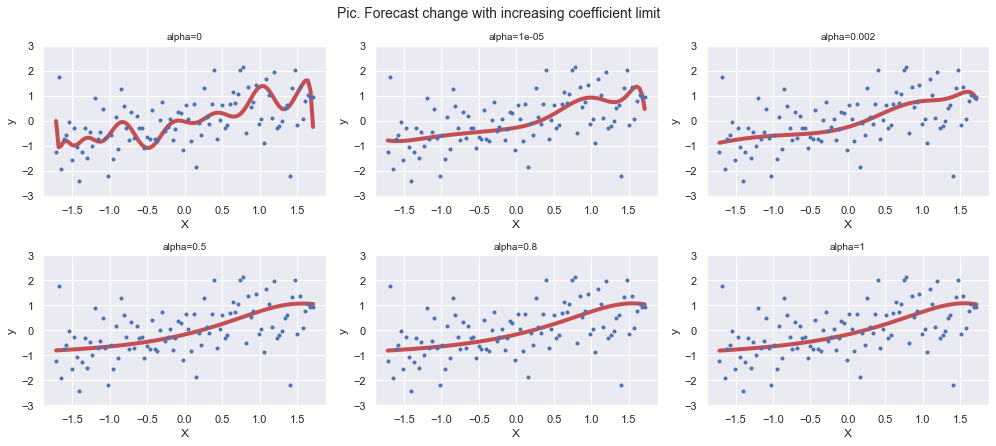

In [70]:
# we create data for training the model in the amount of m
m=100
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
# create data to test the model in the amount of m
X_new = np.linspace(0, 3, m).reshape(m, 1)
y_new =  1 + 0.5 * X_new + np.random.randn(m, 1) / 1.5

# prepare 6 graphs for visualizing the forecast with a change in alpha
fig = plt.figure(figsize = (14,6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
# список значений alpha
alpha_list = [0, 0.00001, 0.002, 0.5, 0.8, 1]
for n,i in zip([ni for ni in range(1,len(alpha_list)+1)], alpha_list):
    model = Ridge(i) # sklearn ridge regression model with alpha
    poly_features = PolynomialFeatures(degree=18, include_bias=False) # PolynomialFeatures с степенью 18
    # expanding data for training with polynomial features
    Х_poly_features = poly_features.fit_transform(X)
    # we scale advanced data for training
    X_poly_features_scaled = StandardScaler().fit_transform(Х_poly_features)
    # we scale the target variable for training
    y_scaled = StandardScaler().fit_transform(y)
    
    model.fit(X_poly_features_scaled, y_scaled) # обучаем модель Ridge
    
    # doing the procedure with the data to check (X_new)
    X_new_poly_features = poly_features.fit_transform(X_new) # расширяем
    X_new_poly_features_scaled = StandardScaler().fit_transform(X_new_poly_features) # шкалируем

    y_pred = model.predict(X_new_poly_features_scaled) # делаем предсказание
    
    # plot
    ax = fig.add_subplot(2,3,n)
    # all x and y will be drawn in a scaled version
    ax.plot(StandardScaler().fit_transform(X_new), y_pred, "r", label='X_new', linewidth=4)
    ax.plot(StandardScaler().fit_transform(X_new), StandardScaler().fit_transform(y_new), "b.")
    ax.set_title("alpha={}".format(i), fontsize = 10)
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    ax.set_ylim((-3, 3))
    fig.suptitle("Pic. Forecast change with increasing coefficient limit", \
            fontsize = 14, y = 1.03)
fig.tight_layout()
fig.show()

In [71]:
# add a unit column to the left of the observation matrix (theta zero parameter will be multiplied by 1)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
theta_best_analytic = np.linalg.inv(X_train_with_c.T.dot(X_train_with_c)).dot(X_train_with_c.T).dot(y_train)
pd.DataFrame(theta_best_analytic).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.221771e+12,-2.526761e+12,-1.639724e+13,1.182638e+13,3.806341e+12,1.016590e+12,-1.877763e+12,-1.007148e+13,-3.349189e+12,-2.926770e+11,-2.810878e+12,1.157890e+13,3.324162e+12,-5.446760e+11,1.226611e+13,1.908761e+13,-3.473941e+13,-6.172581e+12,-3.088931e+12,2.841523e+12,-8.971984e+12,-7.405041e+11,5.507266e+12,-2.955738e+12,-4.798986e+12,-2.482034e+12,6.914783e+11,-1.330768e+13,-2.168197e+13,1.874974e+13,4.422791e+13,3.157651e+13,4.281480e+15,-6.357099e+13,1.147735e+15,3.975821e+15,-4.182012e+15,-0.183162,0.560738,-0.223679,0.705964,-2.368356,-0.10649,2.286406,0.841417,0.335473,0.493673,0.712908,-0.769594,-0.975769,0.423069,0.217551,-0.010533,0.265781,-0.91147,-0.256783,1.726889,-1.575567,0.25628,-0.277038,0.092414,-0.107543,-0.018626,-0.040842,0.569737,0.02538,0.455367,0.054655,-0.041153


In [72]:
# set the alpha parameter
alpha = 0.5
# create matrix A
A = np.zeros((theta_best_analytic.shape[0],theta_best_analytic.shape[0]))
for s,c in zip([si for si in range(A.shape[0])], [ci for ci in range(A.shape[1])]):
    A[s,c] = alpha
A[0,0] = 0
A

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0.5, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0.5]])

In [73]:
theta_best_ridge = np.linalg.inv(X_train_with_c.T.dot(X_train_with_c) + alpha*A).dot(X_train_with_c.T).dot(y_train)
pd.DataFrame(np.round(theta_best_ridge, 3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,12.023,-0.019,0.023,-0.004,0.009,0.01,-0.002,0.008,0.009,0.012,0.009,0.074,0.021,-0.009,-0.004,-0.021,0.085,0.042,0.003,0.014,0.01,0.011,0.014,0.003,0.002,0.003,0.008,0.012,0.016,-0.001,0.018,0.001,0.02,-0.011,0.007,0.005,0.029,0.0,0.015,0.012,-0.005,0.041,0.008,0.024,0.0,0.026,0.014,0.008,-0.004,0.013,0.047,0.013,0.03,0.007,-0.016,0.004,0.034,0.012,0.01,0.018,0.006,0.009,0.007,0.02,-0.002,-0.001,-0.0,-0.007,0.014


In [74]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
pd.DataFrame(X_test_with_c[:5,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.0,-0.872563,0.369696,1.459405,0.741961,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,-0.705184,0.230222,0.043584,0.293274,-0.238713,-0.795151,-1.416142,-0.538802,-0.526484,1.93743,-0.090611,-1.095646,-0.744832,-0.570750,-0.686832,0.224181,-0.700274,-0.794480,0.158022,0.469439,-0.371681,-0.301880,-0.716144,6.439444,-0.442005,1.608853,0.110897,-1.079201,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,-1.026041,1.227585,0.163779,-0.211454,-0.799406,-0.318683,0.235818,1.044941,0.592083,-0.983336,-0.832343,-0.088804,0.29652,0.293953,-0.752176,5.606538,-0.359325,-0.116339,5.327377,-0.068692,-0.087688,0.250891,-1.367655,-1.641766
1,1.0,-0.872563,1.330042,-0.447940,-0.332419,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,0.904011,0.230222,0.043584,0.293274,-0.238713,0.651479,-0.517200,1.150356,1.024029,-0.48123,-0.090611,1.072634,-0.744832,-0.570750,1.060251,0.224181,1.080123,0.580556,1.676686,-0.454061,-0.315656,-0.973018,0.237158,-0.288653,1.643047,0.537152,0.110897,0.951885,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,0.789741,-0.761621,-1.062465,-0.211454,0.742593,-0.934130,0.235818,1.044941,0.592083,1.142656,0.603026,0.463291,0.29652,0.293953,0.971744,1.122391,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-1.367655,2.954465
2,1.0,-0.872563,0.369696,-0.039223,0.091019,0.064238,1.178999,-0.021138,0.02618,0.056141,-0.226796,-0.517965,0.230222,0.043584,0.293274,-0.238713,-0.795151,0.381743,-0.571923,-1.495554,-0.48123,-0.090611,0.376965,-0.744832,-0.570750,-0.686832,0.224181,-0.700274,-0.794480,0.158022,-0.454061,-0.821331,0.092907,0.237158,-0.288653,-0.102420,-0.112710,0.110897,-0.589938,0.263813,0.302239,-0.795163,-0.120242,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.799406,-1.549576,0.235818,1.044941,0.592083,-1.025022,0.603026,-0.926303,0.29652,0.293953,-0.752176,-0.704483,1.604726,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,-1.367655,-0.133076
3,1.0,0.546344,0.369696,1.186928,0.126297,0.064238,1.178999,-0.021138,0.02618,-0.363181,-0.226796,-0.705184,0.230222,0.043584,0.293274,-0.171995,-0.795151,0.381743,-0.174474,-0.914112,-0.48123,-0.090611,1.072634,0.793159,-0.033858,-0.686832,0.224181,-0.700274,-0.794480,0.158022,0.890693,-0.748810,-0.253628,1.716656,3.128104,-0.638964,0.243004,0.110897,0.951885,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.799406,-0.318683,0.235818,-0.069490,0.592083,-0.524788,0.603026,0.425861,0.29652,0.293953,0.524802,0.322190,3.568777,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-1.367655,-1.641766
4,1.0,0.073375,0.369696,1.731883,0.290761,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,1.975181,0.230222,0.043584,0.293274,1.244484,1.374795,-0.517200,1.084115,0.975575,-0.48123,-0.090611,1.072634,2.277524,0.159866,1.060251,0.224181,1.080123,2.294941,0.158022,0.890693,-0.315656,-0.973018,0.237158,-0.288653,1.244601,0.135834,0.110897,0.951885,0.263813,0.302239,2.229731,-0.120242,-0.819964,-0.241061,2.605522,1.227585,1.390023,-0.211454,0.742593,1.527656,0.235818,1.044941,1.518300,1.059284,1.204115,1.020064,0.29652,0.293953,0.149690,-0.221343,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-1.367655,-0.133076


In [75]:
# make a prediction using our model
y_pred_ridge = X_test_with_c.dot(theta_best_ridge)
all_metrics.append(['Ridge', mean_squared_error(y_test, y_pred_ridge)])
mean_squared_error(y_test, y_pred_ridge)

0.01776032028758574

Now compare with the sklearn implementation:

In [76]:
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [77]:
all_metrics.append(['sklearn_Ridge', mean_squared_error(y_test, model_ridge.predict(X_test))])
mean_squared_error(y_test, model_ridge.predict(X_test))

0.017756199875276126

`Note:` native and off-the-shelf implementations work with roughly the same RMSE

# Lasso regression
#### ($L_1$ -regularization, least absolute shrinkage and selection operator regression regression)

Lasso regression is another type of regularized regression models in which the L1 norm of the weight vector $\theta$ is used instead of 1/2 the norm square of the weight vector $\theta$ (as in the case of ridge regression).

Lasso regression loss function:

$$ J(\theta) = MSE(X,h_\theta) + \alpha \sum_{i=1}^m |\theta_i| $$

Where:

$\alpha$ - normalization parameter, determines how much we regularize the model. With $\alpha=0$, the lasso regression becomes just a linear regression. When $\alpha$ is close to 1, the coefficients (weights) of the model tend to zero (the least important signs are reset first).

$\theta_i$ - model parameters from $\theta_1$ to $\theta_m$. Moreover, $\theta_0$ (parameter with a free term) is not regularized.

`Advantages`: an important feature of lasso regression is its ability to nullify the coefficients ($\theta$) for the least important features, i.e. provide a more sparse (with fewer coefficients) model. The value of the coefficient contributes to the loss function rather large (taken modulo); ideally, to minimize such a contribution, it would be nice to reset the coefficients affecting the forecast accuracy very little. In the case of ridge regression, where the contribution of the value of each coefficient to the loss function is the squared coefficient, it is enough to underestimate the coefficient so that it becomes less than 1 (since numbers from 0 to 1 give a smaller number when squared).

`Disadvantages`: the lasso-regression loss function is not differentiable at zero, you will have to apply gradient descent and do the trick using a subgradient.

Error function with the addition of a vector-subgradient (which we use at points with x's equal to 0):

$$
MSE(X,h_\theta) + \alpha
\left(\begin{array}{cc} 
sign (\theta_1) \\
sign (\theta_2) \\
... \\
sign (\theta_n)
\end{array}\right) 
$$ 

Where:

$sign (\theta_i) = \begin{cases} 
\displaystyle -1,  \text{если $\theta_i$ < 0} \\
\displaystyle 0,  \text{если $\theta_i$ = 0} \\
\displaystyle +1, \text{если $\theta_i$ > 0}
\end{cases}$

In [78]:
def gradient_descent(mu, x, y, params, numIterations, lf='MSE', prnt=False):
    """
    The function implements a batch gradient descent algorithm.
    mu - learning rate
    params - number of parameters, including free parameter
    numIterations - number of iterations (int)
    prnt - whether or not to print the calculation, if prnt = True, then at every hundredth step the value of the loss function is displayed
    lf - loss function, default 'MSE', you can select 'MAE'
    """
    
    n = x.shape[0] # number of observations in the sample
    theta = np.ones(params).reshape(params,1) # [ 1.  1. 1.] - начальные значения коэффициентов пусть будут равны 1
    x_transpose = x.transpose() # transposed matrix x
    #print('y', y.shape)
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # matrix multiplication
        loss = hypothesis - y.values.reshape(len(y),1) # residue value
        
        if lf=='MSE':
            J = np.sum(loss ** 2) / n  # loss function (squares)
            if prnt and (iter % 10000)==0:
                print( "iter %s | MSE: %.3f" % (iter, J) )
        
        elif lf=='MAE':
            J = np.sum(abs(loss)) / n  # loss function (modules)
            if prnt and (iter % 10000)==0:
                print( "iter %s | MAE: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) * 2 / n         
        theta = theta - mu * gradient  # update
    
    return (theta)

In [79]:
def gradient_descent_with_subgrad(mu, x, y, alpha, params, numIterations, prnt=False):
    """
    The function implements a batch gradient descent algorithm using a subgradient with x values equal to 0.
    mu - learning rate
    alpha - hyperparameter of the Lasso regression loss function
    params - number of parameters, including free parameter
    numIterations - number of iterations (int)
    prnt - whether or not to print the calculation, 
    if prnt = True, then at every hundredth step the value of the loss function is displayed
    """
    
    n = x.shape[0] # number of observations in the sample
    theta = np.ones(params).reshape(params,1) # [ 1.  1. 1.] - initial values of the coefficients let be equal to 1
    x_transpose = x.transpose() # transposed matrix x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # matrix multiplication
        loss = hypothesis - y.values.reshape(-1,1) # residue value
        
        
        J = np.sum(loss ** 2) / n  + alpha*np.sum(np.abs(theta[1:,:]))# loss function (squares)
        if prnt and (iter % 10000)==0:
            print( "iter %s | MSE + alpha*sum(abs(theta)): %.3f" % (iter, J) )
        
        if np.sum(theta == 0)>0: # if at least one of theta parameters is zero
            gradient = np.dot(x_transpose, loss) * 2 / n # the gradient is initially calculated as usual
            # but we add one more term to the gradient to circumvent the non-differentiability of the loss function at zeros
            term = (gradient > 0)*np.ones(gradient.shape[0]).reshape(gradient.shape[0],1) + \
            (gradient < 0)*np.ones(gradient.shape[0]).reshape(gradient.shape[0],1)*(-1)
            # add this term to the gradient
            gradient = gradient + alpha*term.reshape(gradient.shape[0], 1)
        else:
            gradient = np.dot(x_transpose, loss) * 2 / n # in other cases, the gradient is calculated as usual
            
        theta = theta - mu * gradient  # update
    
    return (theta)

In [80]:
%%time
# add a unit column to the left of the observation matrix (theta zero parameter will be multiplied by 1)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
# run the gradient descent algorithm
theta_best_lasso = gradient_descent_with_subgrad(0.0001, X_train_with_c, y_train, 0.5, params=X_train_with_c.shape[1], numIterations=100000, prnt=True)

iter 0 | MSE + alpha*sum(abs(theta)): 641.560
iter 10000 | MSE + alpha*sum(abs(theta)): 8.898
iter 20000 | MSE + alpha*sum(abs(theta)): 3.461
iter 30000 | MSE + alpha*sum(abs(theta)): 2.346
iter 40000 | MSE + alpha*sum(abs(theta)): 1.892
iter 50000 | MSE + alpha*sum(abs(theta)): 1.630
iter 60000 | MSE + alpha*sum(abs(theta)): 1.468
iter 70000 | MSE + alpha*sum(abs(theta)): 1.367
iter 80000 | MSE + alpha*sum(abs(theta)): 1.308
iter 90000 | MSE + alpha*sum(abs(theta)): 1.270
Wall time: 16.2 s


In [81]:
pd.DataFrame(np.round(theta_best_lasso, 3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,12.023,-0.004,0.026,-0.001,0.012,0.009,-0.002,0.008,0.008,0.01,0.009,0.068,0.023,-0.009,0.021,-0.021,0.083,0.052,0.032,0.008,0.011,0.012,0.015,0.007,-0.001,0.001,0.006,0.01,0.015,-0.009,0.013,-0.003,0.478,0.001,0.17,0.448,-0.405,-0.001,0.017,0.01,-0.005,0.047,0.01,0.025,-0.002,0.023,0.012,0.017,0.015,0.018,0.033,0.013,0.034,0.0,-0.019,-0.0,0.038,0.014,0.006,0.019,0.005,0.012,0.007,0.021,-0.005,-0.001,-0.001,-0.008,0.014


Now you can use our trained model for forecasts. Let's make a forecast for test.

In [82]:
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
pd.DataFrame(X_test_with_c[:5,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.0,-0.872563,0.369696,1.459405,0.741961,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,-0.705184,0.230222,0.043584,0.293274,-0.238713,-0.795151,-1.416142,-0.538802,-0.526484,1.93743,-0.090611,-1.095646,-0.744832,-0.570750,-0.686832,0.224181,-0.700274,-0.794480,0.158022,0.469439,-0.371681,-0.301880,-0.716144,6.439444,-0.442005,1.608853,0.110897,-1.079201,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,-1.026041,1.227585,0.163779,-0.211454,-0.799406,-0.318683,0.235818,1.044941,0.592083,-0.983336,-0.832343,-0.088804,0.29652,0.293953,-0.752176,5.606538,-0.359325,-0.116339,5.327377,-0.068692,-0.087688,0.250891,-1.367655,-1.641766
1,1.0,-0.872563,1.330042,-0.447940,-0.332419,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,0.904011,0.230222,0.043584,0.293274,-0.238713,0.651479,-0.517200,1.150356,1.024029,-0.48123,-0.090611,1.072634,-0.744832,-0.570750,1.060251,0.224181,1.080123,0.580556,1.676686,-0.454061,-0.315656,-0.973018,0.237158,-0.288653,1.643047,0.537152,0.110897,0.951885,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,0.789741,-0.761621,-1.062465,-0.211454,0.742593,-0.934130,0.235818,1.044941,0.592083,1.142656,0.603026,0.463291,0.29652,0.293953,0.971744,1.122391,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-1.367655,2.954465
2,1.0,-0.872563,0.369696,-0.039223,0.091019,0.064238,1.178999,-0.021138,0.02618,0.056141,-0.226796,-0.517965,0.230222,0.043584,0.293274,-0.238713,-0.795151,0.381743,-0.571923,-1.495554,-0.48123,-0.090611,0.376965,-0.744832,-0.570750,-0.686832,0.224181,-0.700274,-0.794480,0.158022,-0.454061,-0.821331,0.092907,0.237158,-0.288653,-0.102420,-0.112710,0.110897,-0.589938,0.263813,0.302239,-0.795163,-0.120242,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.799406,-1.549576,0.235818,1.044941,0.592083,-1.025022,0.603026,-0.926303,0.29652,0.293953,-0.752176,-0.704483,1.604726,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,-1.367655,-0.133076
3,1.0,0.546344,0.369696,1.186928,0.126297,0.064238,1.178999,-0.021138,0.02618,-0.363181,-0.226796,-0.705184,0.230222,0.043584,0.293274,-0.171995,-0.795151,0.381743,-0.174474,-0.914112,-0.48123,-0.090611,1.072634,0.793159,-0.033858,-0.686832,0.224181,-0.700274,-0.794480,0.158022,0.890693,-0.748810,-0.253628,1.716656,3.128104,-0.638964,0.243004,0.110897,0.951885,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.799406,-0.318683,0.235818,-0.069490,0.592083,-0.524788,0.603026,0.425861,0.29652,0.293953,0.524802,0.322190,3.568777,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-1.367655,-1.641766
4,1.0,0.073375,0.369696,1.731883,0.290761,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,1.975181,0.230222,0.043584,0.293274,1.244484,1.374795,-0.517200,1.084115,0.975575,-0.48123,-0.090611,1.072634,2.277524,0.159866,1.060251,0.224181,1.080123,2.294941,0.158022,0.890693,-0.315656,-0.973018,0.237158,-0.288653,1.244601,0.135834,0.110897,0.951885,0.263813,0.302239,2.229731,-0.120242,-0.819964,-0.241061,2.605522,1.227585,1.390023,-0.211454,0.742593,1.527656,0.235818,1.044941,1.518300,1.059284,1.204115,1.020064,0.29652,0.293953,0.149690,-0.221343,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-1.367655,-0.133076


In [83]:
# make a prediction using our model
y_pred_lasso = X_test_with_c.dot(theta_best_lasso)

In [84]:
all_metrics.append(['Lasso', mean_squared_error(y_test, y_pred_lasso)])
mean_squared_error(y_test, y_pred_lasso)

0.018170897091381533

Compare to sklearn implementation

In [85]:
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X_train, y_train)
all_metrics.append(['sklearn_Lasso', mean_squared_error(y_test, lasso_reg.predict(X_test))])
mean_squared_error(y_test, lasso_reg.predict(X_test))

0.1766358314179132

# Elastic Net

An elastic net is a combination of ridge and lasso regression.

Elastic Net Loss Function:

$$ J(\theta) = MSE(X,h_\theta) + r\alpha \sum_{i=1}^m |\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^m \theta_i ^2$$

Where:

$r$ is a hyperparameter that controls the proportion between L2 and L1 regularization.

For $r = 0$, an elastic network becomes just a ridge regression, and for $r = 1$ it becomes a lasso regression.

We implement our own algorithm:

In [86]:
def gradient_descent_with_subgrad_for_elastic_net(mu, x, y, alpha, r, params, numIterations, prnt=False):
    """
    The function implements a batch gradient descent algorithm using a subgradient with x values equal to 0.
    mu - learning rate
    alpha - hyperparameter of the Lasso regression loss function
    params - number of parameters, including free parameter
    numIterations - number of iterations (int)
    prnt - whether or not to print the calculation, if prnt = True, 
    then at every hundredth step the value of the loss function is displayed
    """
    
    n = x.shape[0] # number of observations in the sample
    theta = np.ones(params).reshape(params,1) # [ 1.  1. 1.] - initial values of the coefficients let be equal to 1
    x_transpose = x.transpose() # transposed matrix x
    
    for iter in range( 0, numIterations ):
        hypothesis = np.dot(x, theta) # matrix multiplication
        loss = hypothesis - y.values.reshape(-1,1) # residue value
        
        J = np.sum(loss ** 2) / n  + r*alpha*np.sum(np.abs(theta[1:,:])) + (1-r)/2 * alpha*np.sum(theta[1:,:]**2)
        if prnt and (iter % 10000)==0:
            print( "iter %s | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): %.3f" % (iter, J) )
        
        if np.sum(theta == 0)>0: # if at least one of theta parameters is zero
            gradient = np.dot(x_transpose, loss) * 2 / n # the gradient is initially calculated as usual
            # but we add one more term to the gradient to circumvent the non-differentiability of the loss function at zeros
            term = (gradient > 0)*np.ones(gradient.shape[0]).reshape(gradient.shape[0],1) + \
            (gradient < 0)*np.ones(gradient.shape[0]).reshape(gradient.shape[0],1)*(-1)
            # add this term to the gradient
            gradient = gradient + alpha*term.reshape(gradient.shape[0], 1)
        else:
            gradient = np.dot(x_transpose, loss) * 2 / n # in other cases, the gradient is calculated as usual
            
        theta = theta - mu * gradient  # update
    
    return (theta)

In [87]:
%%time
# add a unit column to the left of the observation matrix (theta zero parameter will be multiplied by 1)
X_train_with_c = np.c_[np.ones((X_train.shape[0], 1)), X_train] 
# run the gradient descent algorithm
theta_best_enet = gradient_descent_with_subgrad_for_elastic_net(0.0001, X_train_with_c, y_train, 0.5, 0.5, params=X_train_with_c.shape[1], numIterations=100000, prnt=True)

iter 0 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 633.060
iter 10000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 6.455
iter 20000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 2.036
iter 30000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 1.336
iter 40000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 1.068
iter 50000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.919
iter 60000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.830
iter 70000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.776
iter 80000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.745
iter 90000 | MSE+r*alpha*sum(abs(theta))+(1-r)/2*alpha(theta^2): 0.725
Wall time: 17.8 s


In [88]:
pd.DataFrame(np.round(theta_best_enet, 3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,12.023,-0.004,0.026,-0.001,0.012,0.009,-0.002,0.008,0.008,0.01,0.009,0.068,0.023,-0.009,0.021,-0.021,0.083,0.052,0.032,0.008,0.011,0.012,0.015,0.007,-0.001,0.001,0.006,0.01,0.015,-0.009,0.013,-0.003,0.478,0.001,0.17,0.448,-0.405,-0.001,0.017,0.01,-0.005,0.047,0.01,0.025,-0.002,0.023,0.012,0.017,0.015,0.018,0.033,0.013,0.034,0.0,-0.019,-0.0,0.038,0.014,0.006,0.019,0.005,0.012,0.007,0.021,-0.005,-0.001,-0.001,-0.008,0.014


In [89]:
# take test data
# add left column vector with units
X_test_with_c = np.c_[np.ones((X_test.shape[0], 1)), X_test] 
pd.DataFrame(X_test_with_c[:5,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.0,-0.872563,0.369696,1.459405,0.741961,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,-0.705184,0.230222,0.043584,0.293274,-0.238713,-0.795151,-1.416142,-0.538802,-0.526484,1.93743,-0.090611,-1.095646,-0.744832,-0.570750,-0.686832,0.224181,-0.700274,-0.794480,0.158022,0.469439,-0.371681,-0.301880,-0.716144,6.439444,-0.442005,1.608853,0.110897,-1.079201,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,-1.026041,1.227585,0.163779,-0.211454,-0.799406,-0.318683,0.235818,1.044941,0.592083,-0.983336,-0.832343,-0.088804,0.29652,0.293953,-0.752176,5.606538,-0.359325,-0.116339,5.327377,-0.068692,-0.087688,0.250891,-1.367655,-1.641766
1,1.0,-0.872563,1.330042,-0.447940,-0.332419,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,0.904011,0.230222,0.043584,0.293274,-0.238713,0.651479,-0.517200,1.150356,1.024029,-0.48123,-0.090611,1.072634,-0.744832,-0.570750,1.060251,0.224181,1.080123,0.580556,1.676686,-0.454061,-0.315656,-0.973018,0.237158,-0.288653,1.643047,0.537152,0.110897,0.951885,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,0.789741,-0.761621,-1.062465,-0.211454,0.742593,-0.934130,0.235818,1.044941,0.592083,1.142656,0.603026,0.463291,0.29652,0.293953,0.971744,1.122391,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-1.367655,2.954465
2,1.0,-0.872563,0.369696,-0.039223,0.091019,0.064238,1.178999,-0.021138,0.02618,0.056141,-0.226796,-0.517965,0.230222,0.043584,0.293274,-0.238713,-0.795151,0.381743,-0.571923,-1.495554,-0.48123,-0.090611,0.376965,-0.744832,-0.570750,-0.686832,0.224181,-0.700274,-0.794480,0.158022,-0.454061,-0.821331,0.092907,0.237158,-0.288653,-0.102420,-0.112710,0.110897,-0.589938,0.263813,0.302239,-0.795163,-0.120242,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.799406,-1.549576,0.235818,1.044941,0.592083,-1.025022,0.603026,-0.926303,0.29652,0.293953,-0.752176,-0.704483,1.604726,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,-1.367655,-0.133076
3,1.0,0.546344,0.369696,1.186928,0.126297,0.064238,1.178999,-0.021138,0.02618,-0.363181,-0.226796,-0.705184,0.230222,0.043584,0.293274,-0.171995,-0.795151,0.381743,-0.174474,-0.914112,-0.48123,-0.090611,1.072634,0.793159,-0.033858,-0.686832,0.224181,-0.700274,-0.794480,0.158022,0.890693,-0.748810,-0.253628,1.716656,3.128104,-0.638964,0.243004,0.110897,0.951885,0.263813,0.302239,-0.795163,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,-0.799406,-0.318683,0.235818,-0.069490,0.592083,-0.524788,0.603026,0.425861,0.29652,0.293953,0.524802,0.322190,3.568777,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-1.367655,-1.641766
4,1.0,0.073375,0.369696,1.731883,0.290761,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,1.975181,0.230222,0.043584,0.293274,1.244484,1.374795,-0.517200,1.084115,0.975575,-0.48123,-0.090611,1.072634,2.277524,0.159866,1.060251,0.224181,1.080123,2.294941,0.158022,0.890693,-0.315656,-0.973018,0.237158,-0.288653,1.244601,0.135834,0.110897,0.951885,0.263813,0.302239,2.229731,-0.120242,-0.819964,-0.241061,2.605522,1.227585,1.390023,-0.211454,0.742593,1.527656,0.235818,1.044941,1.518300,1.059284,1.204115,1.020064,0.29652,0.293953,0.149690,-0.221343,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-1.367655,-0.133076


In [90]:
# make a prediction using our model
y_pred_elnet = X_test_with_c.dot(theta_best_enet)

In [91]:
all_metrics.append(['Elastic_net', mean_squared_error(y_test, y_pred_elnet)])
mean_squared_error(y_test, y_pred_elnet)

0.018170897091381533

In [92]:
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)
all_metrics.append(['sklearn_Elastic_net', mean_squared_error(y_test, elastic_net.predict(X_test))])
mean_squared_error(y_test, elastic_net.predict(X_test))

0.13819257064110926

# Conclusions:

#### Achieving work goals:

1. The study of the most famous regression models used for forecasting (comparing results, determining the advantages and disadvantages of models).

2. Collection and preparation of real weather data (predictors) and house price data (target variable) for study.

3. The use of regression models on real data to predict the yield of house prices.

##### Implementation of design work tasks:

To study and put into practice the following regression models:

* Linear regression. __Performed.__
* Ridge regression. __Performed.__
* Lasso regression. __Performed.__
* Elastic network. __Performed.__

To study and apply optimization methods:

* Analytical solutions. __Performed.__
* Gradient descent:
* batch. __Performed.__
* stochastic. __Performed.__
* mini batch. __Performed.__
    

Collect and prepare weather data, solve the problem of comparability (identical information in different sources is indicated by different names, often measurements are made in different units) and incomplete data (data are not available for long periods) in the following ways:

* Processing of data provided by the customer (work with missing values, aggregation of indicators by periods). __Performed.__
* Enrichment of weather data with data obtained by the API from open sources. __Performed.__
* Designing signs that operate on different phases of the price of houses. __Performed.__

# Choose the best algorithm.

In [93]:
pd.DataFrame(all_metrics, columns=['Algo', 'RMSE']).sort_values('RMSE')

,Algo,RMSE
7,sklearn_Ridge,1.775620e-02
6,Ridge,1.776032e-02
1,sklearn_LR,1.777161e-02
2,Gradient_Descent,1.817090e-02
8,Lasso,1.817090e-02
10,Elastic_net,1.817090e-02
11,sklearn_Elastic_net,1.381926e-01
9,sklearn_Lasso,1.766358e-01
5,Mini_batch_gradient_descent,1.426262e+00
3,Stochastic_Gradient_Descent,3.885698e+02


# Predict 

### We will use our own ridge regression algorithm.

In [94]:
test_df_with_c = np.c_[np.ones((test_df.shape[0], 1)), test_df] 
pd.DataFrame(test_df_with_c[:5,:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1.0,-0.872563,-1.632117,0.460320,0.110763,0.064238,-0.743415,-0.021138,0.02618,-0.363181,-0.226796,-0.517965,-2.506048,0.043584,0.293274,-0.238713,-0.795151,0.381743,-0.340077,-1.156380,-0.48123,-0.090611,1.072634,-0.744832,-0.570750,-0.686832,0.224181,-0.700274,-0.794480,0.158022,-0.454061,-0.898886,0.053428,-0.557079,0.604293,-0.672923,-0.400017,0.110897,-1.079201,0.263813,0.302239,-0.795163,-0.120242,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.799406,-0.934130,0.235818,-0.966812,0.592083,-0.733219,-0.832343,1.202536,0.29652,0.293953,0.365179,-0.704483,-0.359325,-0.116339,1.882709,-0.068692,-0.087688,-0.119110,1.64521,-0.133076
1,1.0,-0.872563,0.369696,0.505733,0.375850,0.064238,1.178999,-0.021138,0.02618,0.056141,-0.226796,-0.517965,0.230222,0.043584,0.293274,-0.238713,-0.071836,0.381743,-0.439440,-1.301740,1.93743,-0.090611,-1.095646,0.793159,0.027027,-0.686832,0.224181,-0.700274,-0.794480,0.158022,-0.454061,-0.371681,1.051363,0.237158,-0.288653,-0.365032,0.619239,0.110897,-1.079201,0.263813,0.302239,-0.795163,-0.120242,-0.819964,-0.241061,-1.026041,1.227585,0.163779,-0.211454,0.742593,-0.318683,0.235818,-0.966812,0.592083,-0.858277,-0.832343,-0.753188,0.29652,0.293953,2.384400,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,25.116309,-0.119110,1.64521,-0.133076
2,1.0,0.073375,0.369696,0.187842,0.332053,0.064238,1.178999,-0.021138,0.02618,-0.363181,-0.226796,0.437147,0.230222,0.043584,0.293274,1.244484,-0.795151,-0.517200,0.852269,0.636400,-0.48123,-0.090611,1.072634,-0.744832,-0.570750,-0.686832,0.224181,1.080123,0.580556,0.158022,-0.454061,1.458980,0.761852,0.237158,-0.288653,-0.974021,-0.295127,0.110897,-0.589938,0.263813,0.302239,0.811239,-0.120242,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.799406,-0.318683,0.235818,0.729790,0.592083,0.767481,1.204115,0.042202,0.29652,0.293953,0.939819,-0.191147,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.229111,1.64521,-0.133076
3,1.0,0.073375,0.369696,0.369494,-0.054002,0.064238,1.178999,-0.021138,0.02618,-0.363181,-0.226796,0.437147,0.230222,0.043584,0.293274,1.244484,-0.071836,0.381743,0.885390,0.636400,-0.48123,-0.090611,1.072634,0.793159,-0.460051,-0.686832,0.224181,1.080123,-0.794480,0.158022,-0.454061,1.458980,0.347326,0.237158,-0.288653,-0.550672,-0.299687,0.110897,0.951885,0.263813,0.302239,0.758532,-0.120242,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.742593,0.296763,0.235818,1.044941,0.592083,0.809167,1.204115,-0.013943,0.29652,0.293953,2.121024,-0.160950,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,1.64521,-0.133076
4,1.0,1.492282,0.369696,-1.219961,-0.552407,0.064238,1.178999,3.678652,0.02618,-0.363181,-0.226796,1.857620,0.230222,0.043584,0.442477,-0.238713,1.374795,-0.517200,0.686666,0.345679,-0.48123,-0.090611,-0.426489,-0.744832,-0.570750,1.060251,0.224181,1.080123,0.580556,0.158022,-0.454061,-0.371681,-0.396190,0.237158,-0.288653,1.018211,0.507509,0.110897,0.951885,0.263813,0.302239,-0.795163,-0.120242,-0.819964,-0.241061,0.789741,-0.761621,-1.062465,-0.211454,0.742593,-0.934130,0.235818,-0.966812,0.592083,0.559051,0.603026,0.154492,0.29652,0.293953,-0.752176,0.533564,-0.359325,-0.116339,2.313293,-0.068692,-0.087688,-1.969111,1.64521,-0.133076


In [95]:
log_predict = test_df_with_c.dot(theta_best_ridge)

In [96]:
np.exp(log_predict)[:5]

array([120451.86877642, 147535.03661507, 165890.074541  , 196817.78249822,
       202830.63004326])

In [97]:
sub_df['SalePrice'] = np.round(np.exp(log_predict), 0)
sub_df.head()

,Id,SalePrice
0,1461,120452.0
1,1462,147535.0
2,1463,165890.0
3,1464,196818.0
4,1465,202831.0


In [98]:
sub_df.to_csv('submission.csv',index=False)